# Project

## Predictive Machine Learning model for Car Insurance Claim Probability


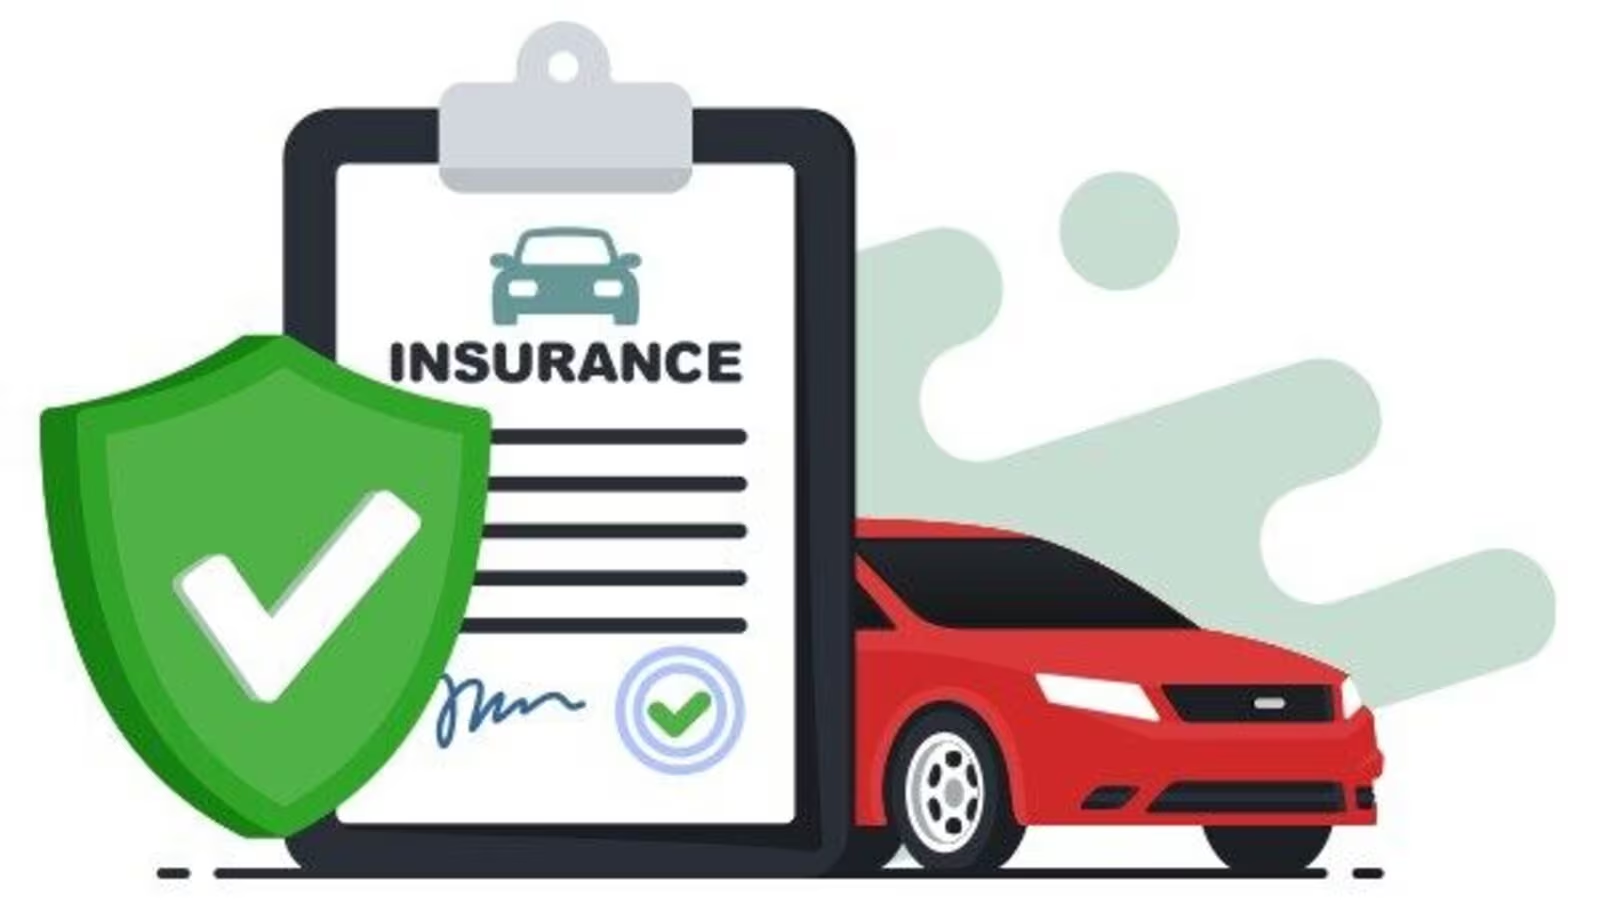

### Objective

- Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

### Introduction
The dataset of an Insurance company has 58592 cases, where most of the cases were classified as 0 (i.e Rejecting the insurance claim request) while small percentage of dataset is classified as 1 (i.e. accepting the insurance claim request). We have to develop a Machine Learning (ML) model to predict whether or not the unknown request for claim will be accepted or rejected.

We are going to develop model using the original dataset and four data level approaches resampling techniques:
- Random Oversampling
- SMOTE
- Random Undersampling
- Hybrid Method
These methods are used to address the issue of imbalance data.

We are going to use 8 ML algorithms: 
- Logistic Regression(LR)
- Random Forest (RF)
- Multilayer Perceptron (MLP)
- Support Vector Machine (SVM)
- Naive Bayes (NB)
- Decision Tree (DT)
- XG Boost
- AdaBoost

To measure the efficience of the model we are going to use seven classifier efficiency measures.
- Accuracy
- Sensitivity/ Recall
- Specificity
- AUC (Area Under the Receiver Operating Characteristic Curve)
- Precision
- F1-measure
- Kappa

 The result of These models will be compaired and final selection of the model based on the efficiency measures will be carried out.


**When it comes to car insurance claims, several factors influence the acceptance and processing of claims. In this problem we have to understand the factors which are influencing claim of policyhoders.When it comes to car insurance claims, several specific features and parameters influence the acceptance of claims. :**

- Car Features:

**Car Make and Model**:

- Certain car models have higher repair costs, affecting claim acceptance.
- Luxury or high-performance cars may have different claim considerations.

**Age of the Car**:
- Older cars might have more wear and tear, impacting claim approval.
- Newer cars may be eligible for better coverage.


**Safety Features**:
- Cars equipped with advanced safety features (airbags, anti-lock brakes, stability control) are favorable.
- Safety ratings impact claim assessments.


**Anti-Theft Devices**:
- Cars with built-in anti-theft systems (alarms, immobilizers) are less risky.
- Insurers consider theft prevention features.


**Modifications and Customizations**:
- Aftermarket modifications (upgraded audio systems, spoilers) affect claims.
- Disclose any alterations to ensure proper coverage.


**Driving Habits and Mileage**:
- High mileage or frequent long trips may impact claims.
- Regular maintenance and safe driving habits matter.

**Previous Claims History**:
- Insurers assess your claim history (past accidents, frequency).
- A clean record improves claim acceptance.

**Geographical Location**:
- Urban vs. rural areas affect risk levels.
- High-crime areas may impact claims.

**Policy Details**:
- Coverage Type: Comprehensive or third-party coverage.
- Deductibles: Higher deductibles affect claim payouts.

**Timely Intimation and Documentation**:
- Report accidents promptly to the insurer.
- Submit duly filled claim forms and necessary documents.

### 1.1 Import Necessory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set()


### 1.2 Data Collection

In [2]:
data = pd.read_csv("Insurance_Data.csv")
pd.set_option('display.max_columns', 50)
data.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

### 1.3 Data Analysis

##### Shape of Data

In [3]:
data.shape

(58592, 44)

##### Information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
data.isnull().sum().sum()

0

 There are 44 columns in the dataset and 0 Null values

##### Description about the data

In [6]:
data.describe(include =['O']).T

count unique                top   freq
policy_id                         58592  58592            ID00001      1
area_cluster                      58592     22                 C8  13654
segment                           58592      6                 B2  18314
model                             58592     11                 M1  14948
fuel_type                         58592      3             Petrol  20532
max_torque                        58592      9      113Nm@4400rpm  17796
max_power                         58592      9   88.50bhp@6000rpm  17796
engine_type                       58592     11  F8D Petrol Engine  14948
is_esc                            58592      2                 No  40191
is_adjustable_steering            58592      2                Yes  35526
is_tpms                           58592      2                 No  44574
is_parking_sensors                58592      2                Yes  56219
is_parking_camera                 58592      2                 No  35704
rear_brakes_type                  58592      2               Drum  44574
transmission_type                 58592      2             Manual  38181
steering_type                     58592      3              Power  33502
is_front_fog_lights               58592      2                Yes  33928
is_rear_window_wiper              58592      2                 No  41634
is_rear_window_washer             58592      2                 No  41634
is_rear_window_defogger           58592      2                 No  38077
is_brake_assist                   58592      2                Yes  32177
is_power_door_locks               58592      2                Yes  42435
is_central_locking                58592      2                Yes  42435
is_power_steering                 58592      2                Yes  57383
is_driver_seat_height_adjustable  58592      2                Yes  34291
is_day_night_rear_view_mirror     58592      2                 No  36309
is_ecw                            58592      2                Yes  42435
is_speed_alert                    58592      2                Yes  58229

Most of the data columns have binary values i.e Yes/No these values can be map to Yes:1 and No:0 using replace function.

In [7]:
data.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

### 1.4 Univariate Data Analysis

- **policy_tenure** 
- **age_of_car**
- **age_of_policyholder**

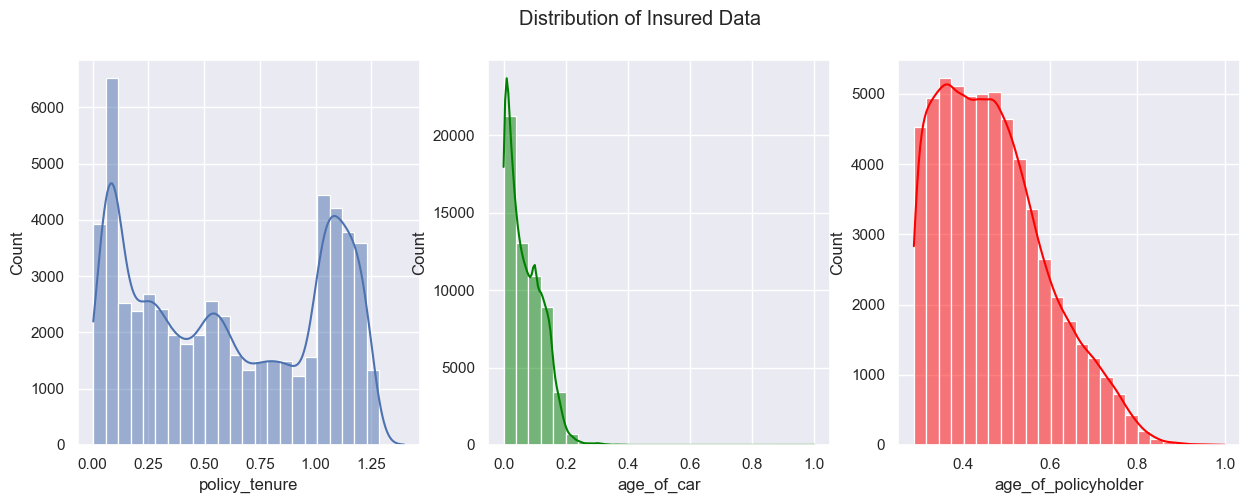

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data['policy_tenure'], kde=True, bins=25)

plt.subplot(1,3,2)
sns.histplot(data['age_of_car'], kde=True, bins=25, color = 'green')

plt.subplot(1,3,3)
sns.histplot(data['age_of_policyholder'], kde=True, bins=25, color = 'red')

plt.suptitle("Distribution of Insured Data")
plt.show()

As the data in Policy Tenure, age_of_car and age_of_policyholder is normalised. so, from above graphs it can be implied that:
- The policy tenure is distributed for diffent time period
- Most of the cars in the dataset are newly purchesed.
- Most policy holders are of young age group with some are in the middle age group

- **Area Cluster**

Text(0.5, 1.0, 'Area Cluster data distribution')

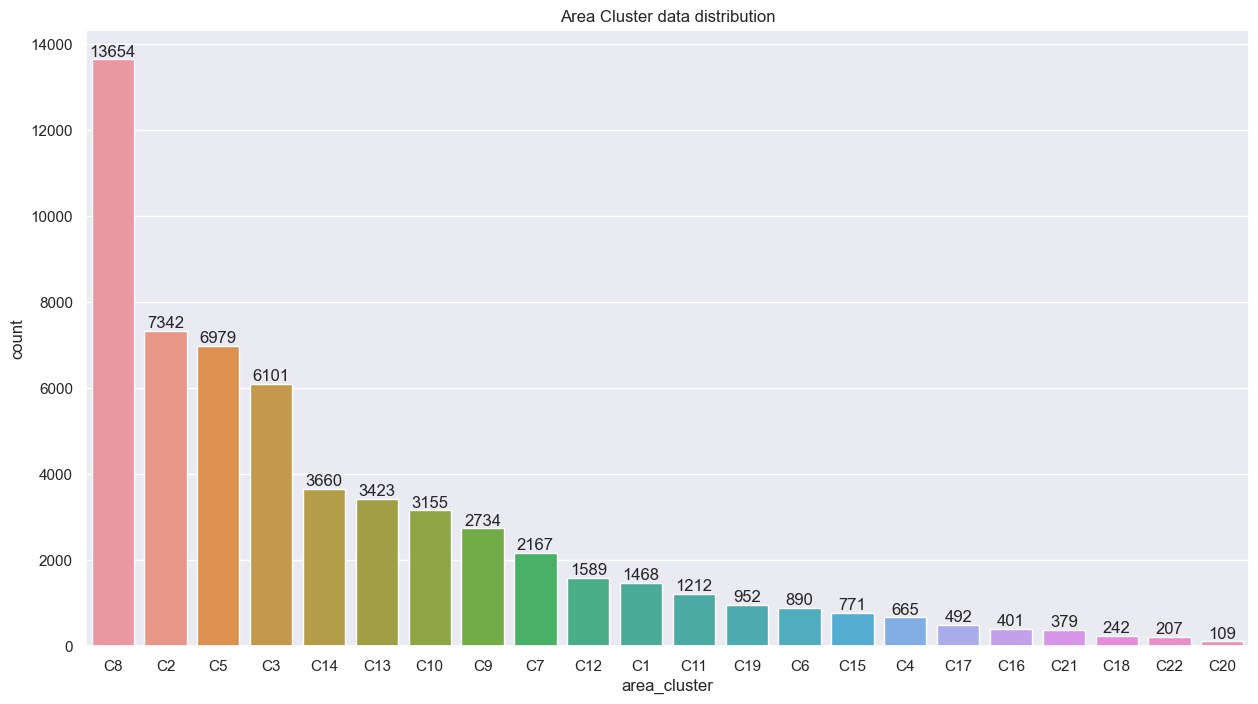

In [9]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data, x = 'area_cluster', order = data['area_cluster'].value_counts().index)
abs_values = data['area_cluster'].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = abs_values)
plt.title("Area Cluster data distribution")

- Maximum cars are from C8 area and least cars ore from C20 area

- **Population Density**

Text(0.5, 1.0, 'Clusterwise car segment distribution')

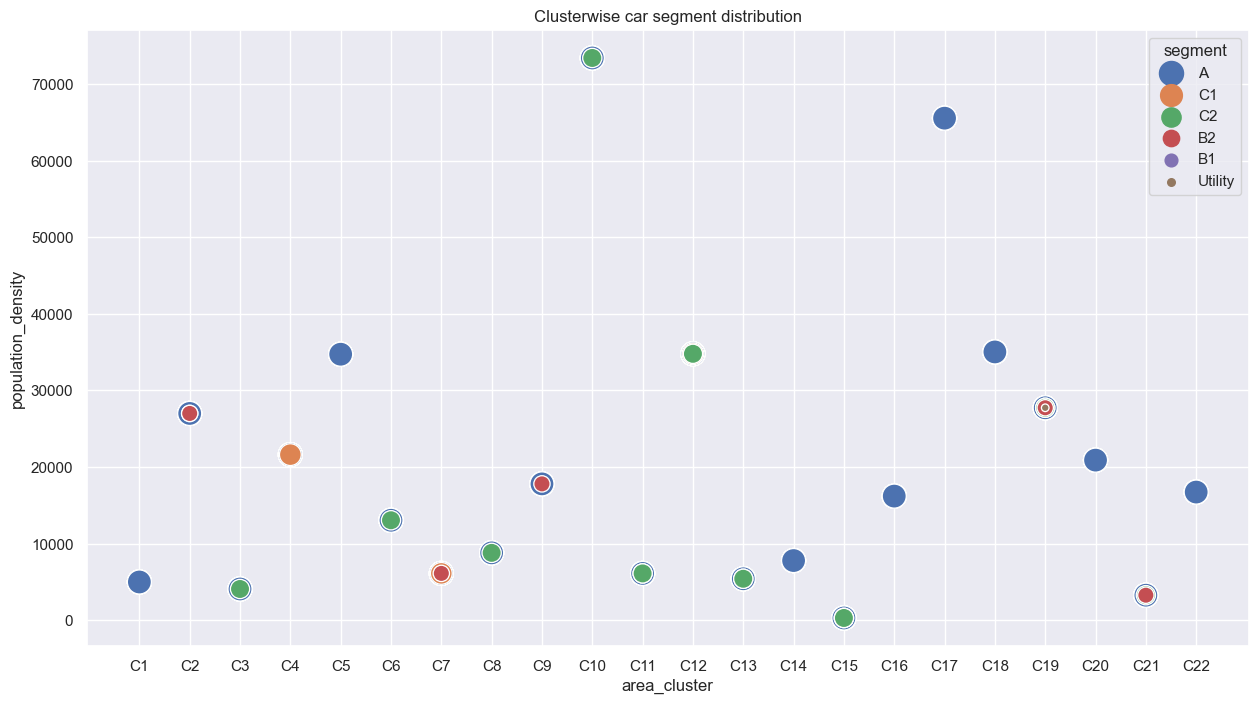

In [10]:
plt.figure(figsize = (15,8))
sns.scatterplot(x= data['area_cluster'], y = data['population_density'], data = data, hue = 'segment', size = 'segment', sizes = (30,300))
plt.title("Clusterwise car segment distribution")

 - From above graph we can find that lowest population density is in **C15** area and highest population density is in **C10** area.

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

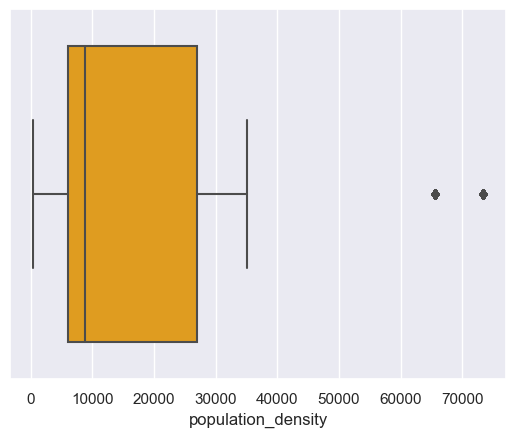

In [11]:
sns.boxplot(x = data['population_density'], color = 'orange')
plt.grid

**Descriptive Statistics:**

- Mean Population_density: The average population_density is approximately 18827 people.
- Median Population_density: The median (or 50th percentile) Population_density is 8794 people.
- Standard Deviation: The population have a standard deviation of 17661,  indicating variability in the population.
- Range: population range from a minimum of 290 people to a maximum of 73430 people.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 6112 people to 27003 people.



**Visualizations:**

- Distribution: The histogram indicates that most region population is under IQP range, with only 2 population density going beyond IQR which are outlier.
- Box Plot: The box plot showcases the spread of the data and potential outliers. There are 2 outlier population density.

In [12]:
# Skewness and Kurtosis
skewness = data['population_density'].skew()
kurtosis = data['population_density'].kurt()
print(skewness, kurtosis)

1.6741777983981572 2.5887967769358333


**Skewness**: The price distribution has a skewness of approximately 1.67, indicating a slight positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most regions are at the the lower end with a few higher density regions.

**Kurtosis**: The kurtosis value is approximately 2.58. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

- **Make**
- **Segment**
- **Fuel Type**

<Axes: title={'center': 'Distribution of Fuel Types'}, ylabel='fuel_type'>

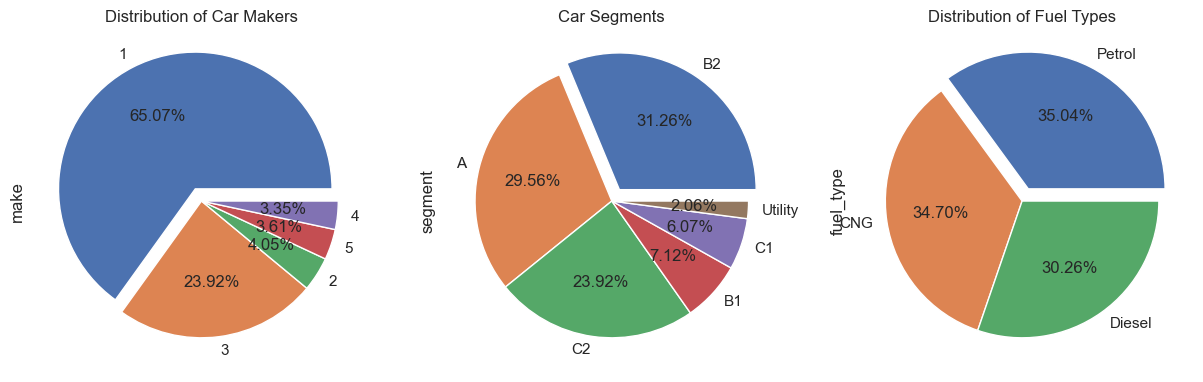

In [13]:
plt.figure(figsize =(15,10))
plt.subplot(1,3,1)
explode  = [0.1,0,0,0,0]
data["make"].value_counts().plot(kind="pie", autopct='%0.2f%%', explode = explode)
plt.title("Distribution of Car Makers")

plt.subplot(1,3,2)
explode  = [0.1,0,0,0,0,0]
data["segment"].value_counts().plot(kind='pie', autopct= "%0.2f%%",explode = explode)
plt.title("Car Segments")

plt.subplot(1,3,3)
explode  = [0.1,0,0]
plt.title("Distribution of Fuel Types")
data["fuel_type"].value_counts().plot(kind = 'pie', autopct= '%0.2f%%', explode = explode)

The pie chart analysis of the Car Makers, Car Segment and Fuel Type shows that:
- 65% of cars are manufactured by 1st Car maker 24% of cars are manufactured by 3rd car maker.
- 85% of Cars belonging to [A, B2, C2] segment. other vehicles are less in number.
- The Fuel Types of the cars are distributed equally in Petrol Diesel and GNG Categories

- **Model**

<Axes: xlabel='model', ylabel='count'>

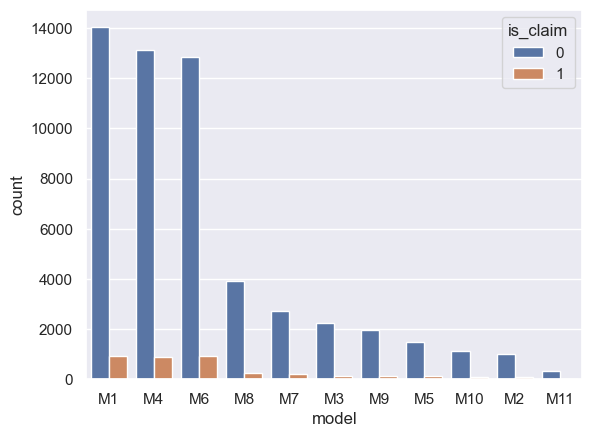

In [14]:
sns.countplot(data, x = 'model', hue = 'is_claim', order = data['model'].value_counts().index)

Text(0.5, 1.0, 'NCAP ratings vs claims')

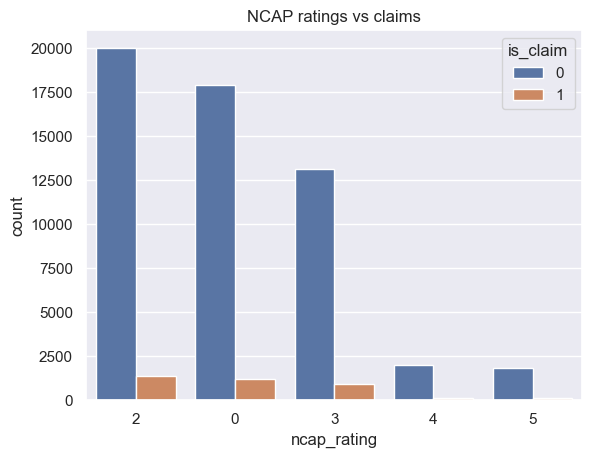

In [15]:
sns.countplot(data, x = 'ncap_rating', hue = 'is_claim', order = data['ncap_rating'].value_counts().index)
plt.title("NCAP ratings vs claims")

- **Engine Type**

Text(0.5, 1.0, 'Countplot for Engine Type')

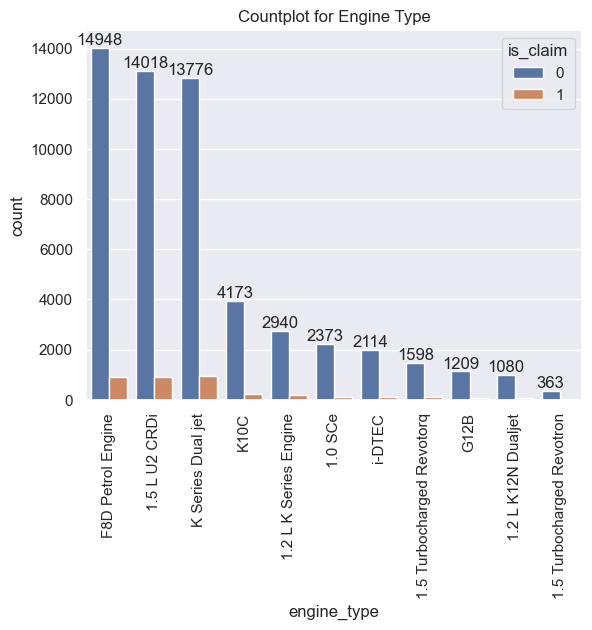

In [16]:
ax = sns.countplot(data, x = 'engine_type', hue = 'is_claim',order = data['engine_type'].value_counts().index)
abs_values = data['engine_type'].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = abs_values)
plt.xticks(rotation = 90)
plt.title("Countplot for Engine Type")

- It can be observed that Model and Engine type have same values and there corresponding target values are also similar, therefore we can drop any one of the column to avoid multicolinearity.

- **Airbags**
- **Rare Brakes Type**
- **Cylinders**
- **Transmission Type**
- **Turning Radius**
- **NCAP rating**

<Axes: title={'center': 'NCAP Ratings'}, ylabel='ncap_rating'>

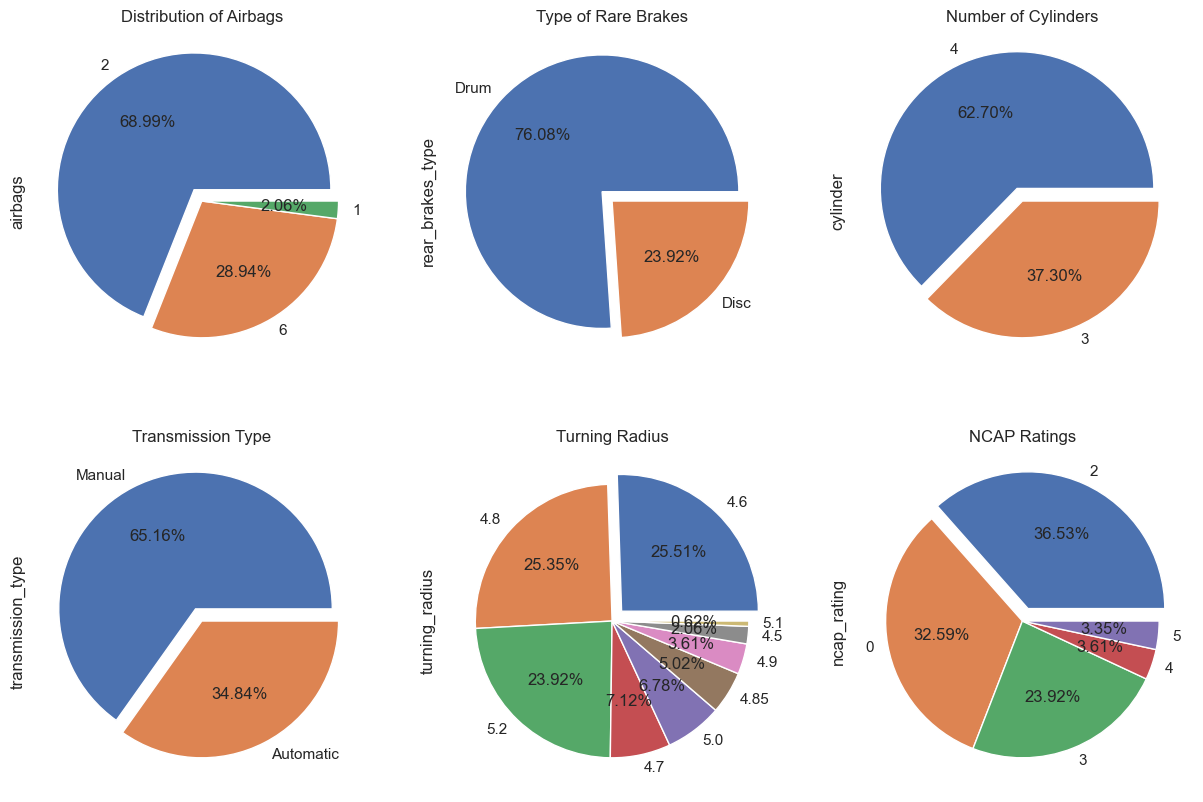

In [17]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
explode  = [0.1,0,0]
plt.title("Distribution of Airbags")
data["airbags"].value_counts().plot(kind = 'pie', autopct = '%0.2f%%',explode = explode)

plt.subplot(2,3,2)
explode  = [0.1,0]
plt.title('Type of Rare Brakes')
data["rear_brakes_type"].value_counts().plot(kind = "pie", autopct = '%0.2f%%',explode = explode)

plt.subplot(2,3,3)
explode  = [0.1,0]
plt.title('Number of Cylinders')
data["cylinder"].value_counts().plot(kind = 'pie',autopct = '%0.2f%%',explode = explode)

plt.subplot(2,3,4)
explode  = [0.1,0]
plt.title('Transmission Type')
data["transmission_type"].value_counts().plot(kind = "pie", autopct = '%0.2f%%',explode = explode)

plt.subplot(2,3,5)
explode  = [0.1,0,0,0,0,0,0,0,0]
plt.title('Turning Radius')
data["turning_radius"].value_counts().plot(kind = "pie", autopct = '%0.2f%%',explode = explode)

plt.subplot(2,3,6)
explode  = [0.1,0,0,0,0]
plt.title('NCAP Ratings')
data["ncap_rating"].value_counts().plot(kind = "pie", autopct = '%0.2f%%',explode = explode)

### 1.5 Multivariate Analysis

#### Policy Tenure,  Age of the Car,  Age of policyholder,  Population Density

Text(0.5, 0.98, 'Multivariate analysis of Insured Data')

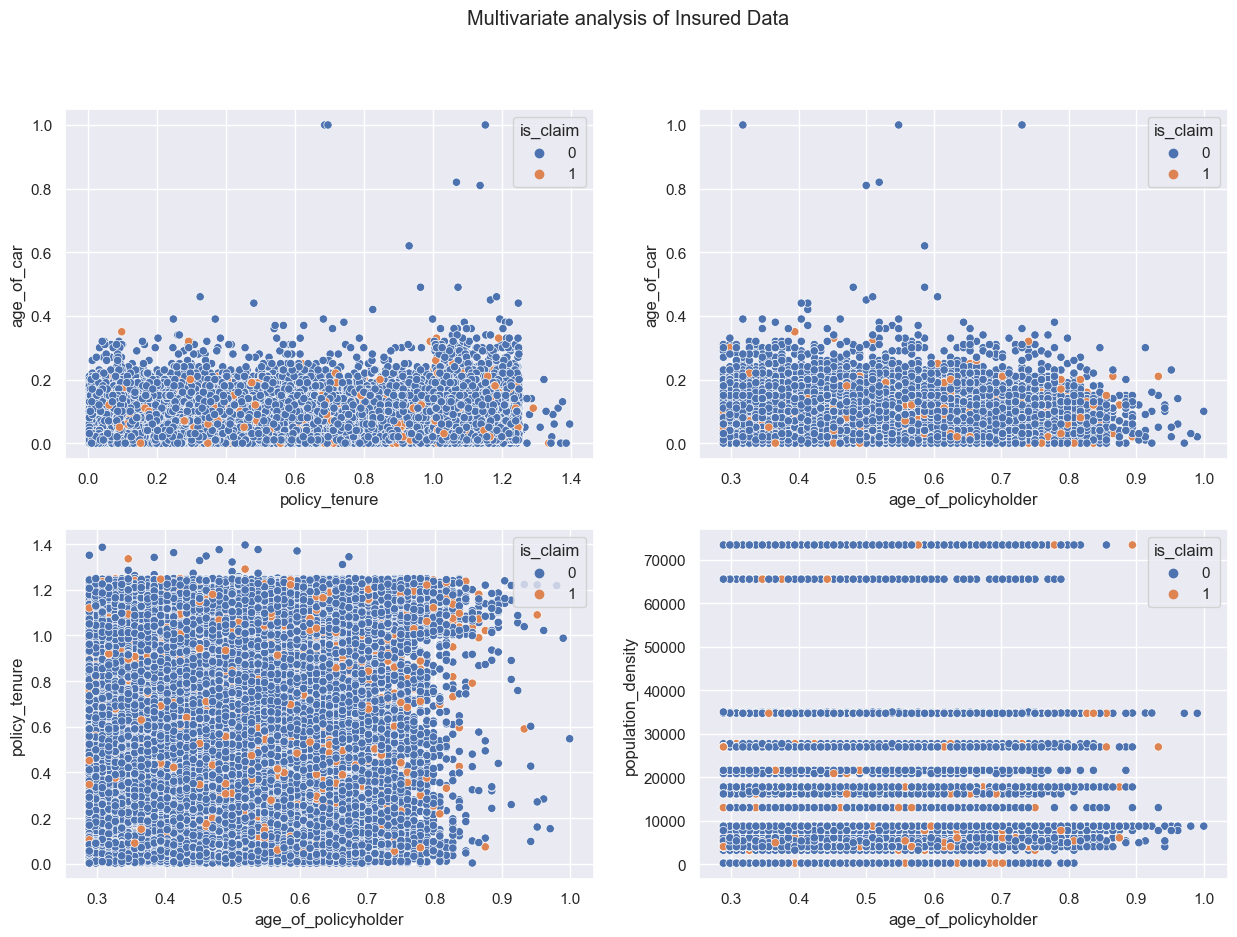

In [18]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = data['policy_tenure'], y = data['age_of_car'], data= data, hue = 'is_claim')

plt.subplot(2,2,2)
sns.scatterplot(x = data['age_of_policyholder'], y =data['age_of_car'], data = data, hue = 'is_claim')

plt.subplot(2,2,3)
sns.scatterplot(x = data['age_of_policyholder'], y = data['policy_tenure'], data = data, hue = 'is_claim')

plt.subplot(2,2,4)
sns.scatterplot(x = data['age_of_policyholder'], y = data['population_density'], data = data, hue = 'is_claim')

plt.suptitle("Multivariate analysis of Insured Data")

- **Policy Tenure vs Policy Claim**

Text(0.5, 0.98, 'Multivariate Analysis of Insured Data')

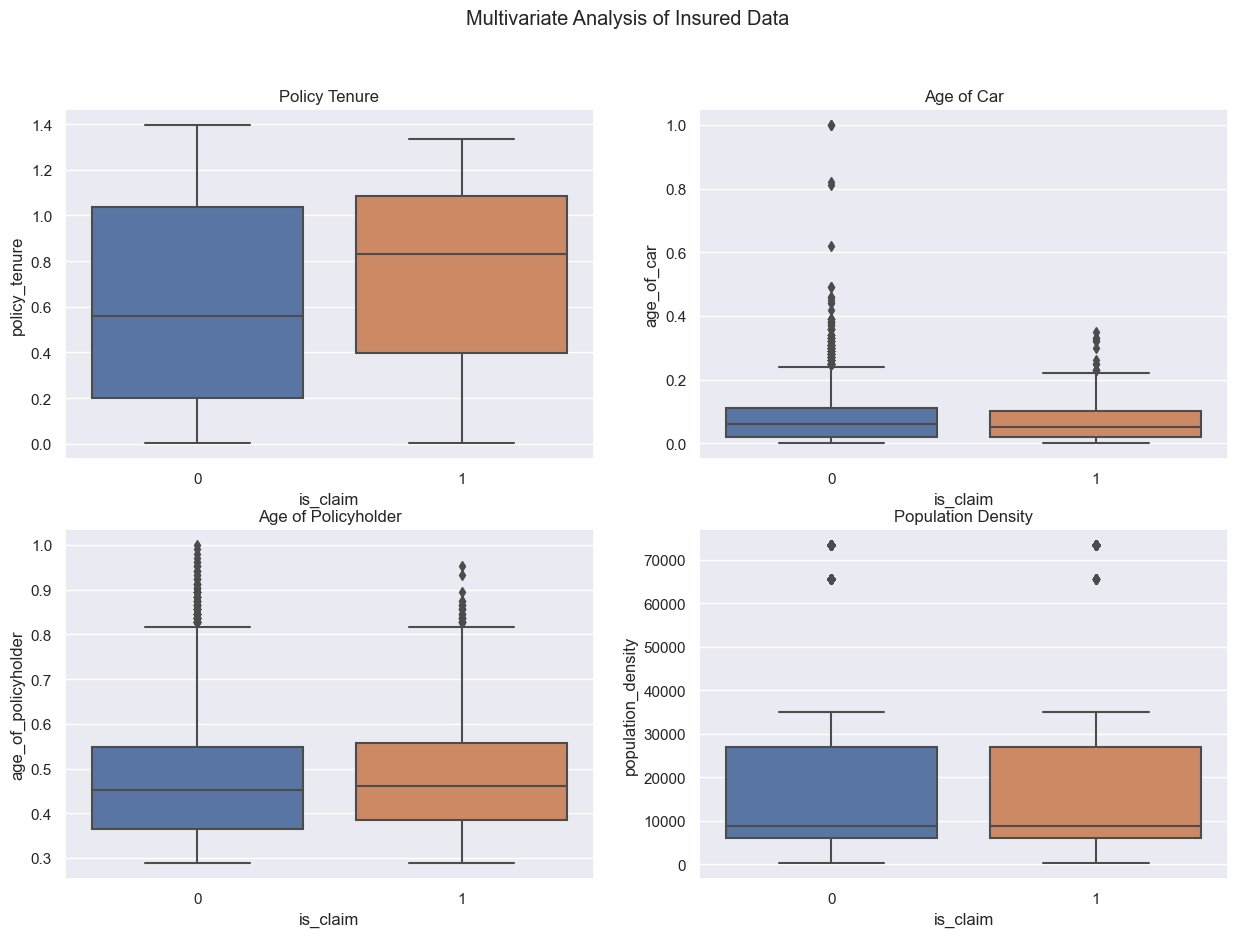

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title("Policy Tenure")
sns.boxplot(x=data['is_claim'], y=data['policy_tenure'])

plt.subplot(2,2,2)
plt.title("Age of Car")
sns.boxplot(x=data['is_claim'], y=data['age_of_car'])

plt.subplot(2,2,3)
plt.title("Age of Policyholder")
sns.boxplot(x=data['is_claim'], y=data['age_of_policyholder'])

plt.subplot(2,2,4)
plt.title("Population Density")
sns.boxplot(x=data['is_claim'], y=data['population_density'])

plt.suptitle("Multivariate Analysis of Insured Data")

- It can be observe that the median value of claimed policies is higher than non claimed policies.
- It indicates that high tenure policies are more likely to settle claims than lower tenure.

In [20]:
def hmap(col):
    sns.heatmap(pd.crosstab(data['is_claim'], data[col]))
    plt.show()

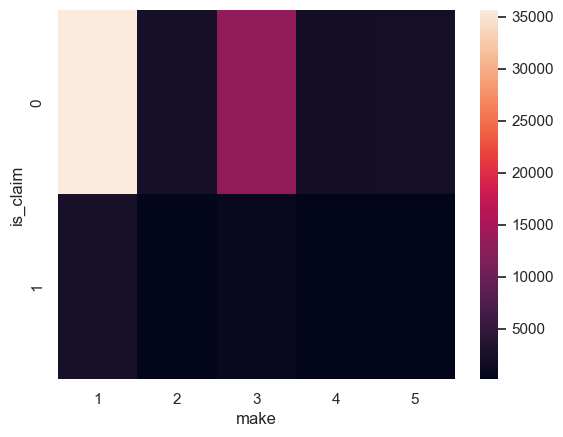

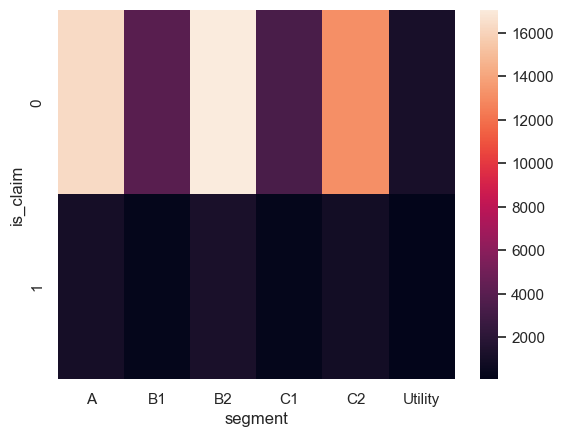

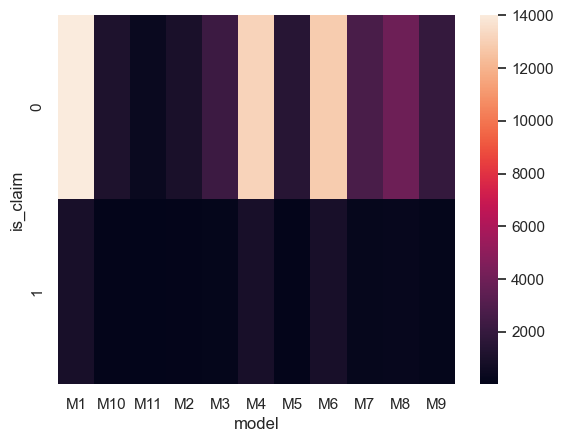

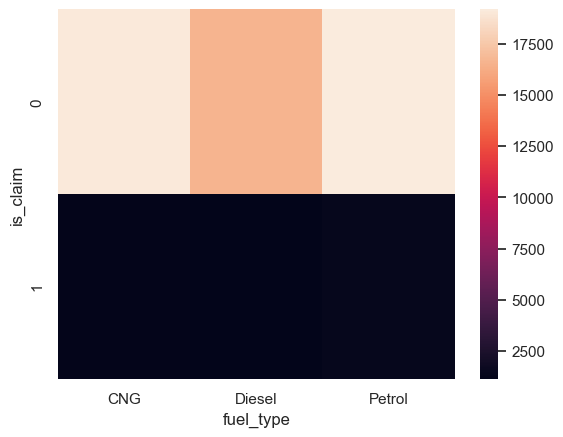

In [21]:
col = ['make', 'segment', 'model','fuel_type']

for i in col:
    hmap(i)
    plt.show()

### 2.1 Feature Engineering

##### Binary Columns Transformation

In [22]:
binary_cols = ['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

In [23]:
data[binary_cols] =data[binary_cols].replace({'Yes': 1, 'No': 0})

In [24]:
data.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags  is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
4  67.06bhp@5500rpm             1.0 SCe        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
4                        0                0                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
4                   1                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0    

##### Torque and Power Transformation

**Torque and Power:**

- **Torque**: Think of torque as the engine’s pulling force. It’s the rotational force produced by the engine’s crankshaft. When you step on the gas pedal, torque is what gets your car moving initially.
- **Power**: Power, often measured in horsepower (hp), represents the rate at which work is done. It combines both torque and engine speed (rpm) to determine how quickly the car can accelerate and reach higher speeds.

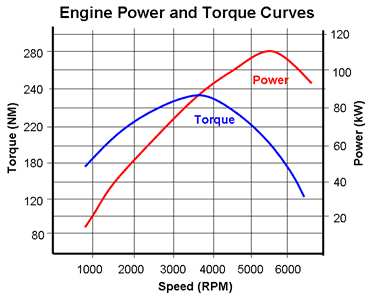

- **Peak Torque**: The point where torque is highest is called the peak torque. It usually occurs at a specific rpm.
- **Peak Power**: Similarly, the point where power is highest is called the peak power. It also occurs at a specific rpm.
- The reason they occur at different rpm values is due to the engine’s design, combustion efficiency, and other factors.

- The two are closely related. In fact, there’s a simple formula that ties them together:
####                                            Horsepower (hp) = Torque × rpm / 5,252
- This means that horsepower can be calculated from measured torque and engine speed.

In [25]:
# Making a copy of data
df = data.copy()

In [26]:
def split_torque(val):
    return pd.Series(val.split("Nm@", 1))

df[['torque', 'rpmt']] = df['max_torque'].apply(split_torque)
df['rpmt'] = df['rpmt'].str.removesuffix('rpm')
df['torque'] = df['torque'].astype(float)
df['rpmt'] = df['rpmt'].astype(int)

In [27]:
def split_power(val):
    return pd.Series(val.split("bhp@", 1))

df[['power', 'rpmp']] = df['max_power'].apply(split_power)
df['rpmp'] = df['rpmp'].str.removesuffix('rpm')
df['power'] = df['power'].astype(float)
df['rpmp'] = df['rpmp'].astype(int)

In [28]:
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags  is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
4  67.06bhp@5500rpm             1.0 SCe        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
4                        0                0                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
4                   1                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0    

##### Calculating the Engine Horsepower

In [29]:
df1 = df.copy()

In [30]:
df1['Eng_hp'] = (df1['torque'] * df1['rpmt'])/5252

In [31]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags  is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
4  67.06bhp@5500rpm             1.0 SCe        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
4                        0                0                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
4                   1                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0    

- The value of Engine Horsepower is nearly similar to peak power, which makes the other columns redundent. We can drop the other columns i.e. 'max_torque','max_power','torque','rpmt','power','rpmp'.

In [32]:
df1 = df1.drop(df[['max_torque','max_power', 'engine_type','torque','rpmt','power','rpmp']], axis = 1)
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  airbags  is_esc  \
0                4990     1       A    M1       CNG        2       0   
1               27003     1       A    M1       CNG        2       0   
2                4076     1       A    M1       CNG        2       0   
3               21622     1      C1    M2    Petrol        2       1   
4               34738     2       A    M3    Petrol        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
4                        0                0                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
4                   1                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim     Eng_hp  
0 

##### Length, Width, Height, Gross Weight Columns

- Since length, Width, Height will not have any impact on insurance claim. Its effect can be ingrained in Gross Weight column. So we can drop these columns and keep only gross weight

In [33]:
df_rem = df1.drop(df[['length','width','height']], axis = 1)

In [34]:
df_rem.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  airbags  is_esc  \
0                4990     1       A    M1       CNG        2       0   
1               27003     1       A    M1       CNG        2       0   
2                4076     1       A    M1       CNG        2       0   
3               21622     1      C1    M2    Petrol        2       1   
4               34738     2       A    M3    Petrol        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  gross_weight  is_front_fog_lights  \
0         Power             4.6          1185                    0   
1         Power             4.6          1185                    0   
2         Power             4.6          1185                    0   
3      Electric             4.8          1335                    1   
4      Electric             5.0          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim     Eng_hp  
0         0  39.984768  
1         0  39.984768  
2         0  39.984768  
3         0  94.668698  
4         0  73.638614

##### Converting Categorical Numeric datatype columns to Object dtype

- As numeric values have certain weightage in calculation different categorical value have different impact. To nullify that effect on categorical data we have to make those columns object dtype and use encoding technique for further calcuation.

In [35]:
cols = ['make', 'airbags','turning_radius']

In [36]:
df_rem[cols] = df_rem[cols].astype(str)

##### Encoding categorical Columns using get_dummies

In [37]:
categorical_cols = ['area_cluster','make','segment','model','fuel_type','airbags','rear_brakes_type','transmission_type','steering_type','turning_radius']

In [38]:
df_encoded = pd.get_dummies(df_rem[categorical_cols], drop_first = True)
pd.set_option('display.max_columns', 100)
df_encoded.head()

area_cluster_C10  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C18  area_cluster_C19  area_cluster_C2  area_cluster_C20  \
0                 0                 0                0                 0   
1                 0                 0                1                 0   
2                 0                 0                0                 0   
3                 0                 0                0                 0   
4                 0                 0                0                 0   

   area_cluster_C21  area_cluster_C22  area_cluster_C3  area_cluster_C4  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                1                0   
3                 0                 0                0                1   
4                 0                 0                0                0   

   area_cluster_C5  area_cluster_C6  area_cluster_C7  area_cluster_C8  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   area_cluster_C9  make_2  make_3  make_4  make_5  segment_B1  segment_B2  \
0                0       0       0       0       0           0           0   
1                0       0       0       0       0           0           0   
2                0       0       0       0       0           0           0   
3                0       0       0       0       0           0           0   
4                0       1       0       0       0           0           0   

   segment_C1  segment_C2  segment_Utility  model_M10  model_M11  model_M2  \
0           0           0                0          0          0         0   
1           0           0                0          0          0         0   
2           0           0                0          0          0         0   
3           1           0                0          0          0         1   
4           0           0                0          0          0         0   

   model_M3  model_M4  model_M5  model_M6  model_M7  model_M8  model_M9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   fuel_type_Diesel  fuel_type_Petrol  airbags_2  airbags_6  \
0                 0                 0          1          0   
1                 0                 0          1          0   
2                 0                 0          1          0   
3                 0                 1          1          0   
4                 0       

In [39]:
df_encoded.shape

(58592, 56)

##### Combining the Binary Columns and Encoded Column to form Dataset

In [40]:
df2 = df_rem.copy()

In [41]:
binary_cols = ['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

In [42]:
df_col = df2[binary_cols + ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','displacement','gross_weight','Eng_hp','ncap_rating','is_claim']]

In [43]:
df_comb = df_encoded.join(df_col)
df_comb.head()

area_cluster_C10  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C18  area_cluster_C19  area_cluster_C2  area_cluster_C20  \
0                 0                 0                0                 0   
1                 0                 0                1                 0   
2                 0                 0                0                 0   
3                 0                 0                0                 0   
4                 0                 0                0                 0   

   area_cluster_C21  area_cluster_C22  area_cluster_C3  area_cluster_C4  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                1                0   
3                 0                 0                0                1   
4                 0                 0                0                0   

   area_cluster_C5  area_cluster_C6  area_cluster_C7  area_cluster_C8  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   area_cluster_C9  make_2  make_3  make_4  make_5  segment_B1  segment_B2  \
0                0       0       0       0       0           0           0   
1                0       0       0       0       0           0           0   
2                0       0       0       0       0           0           0   
3                0       0       0       0       0           0           0   
4                0       1       0       0       0           0           0   

   segment_C1  segment_C2  segment_Utility  model_M10  model_M11  model_M2  \
0           0           0                0          0          0         0   
1           0           0                0          0          0         0   
2           0           0                0          0          0         0   
3           1           0                0          0          0         1   
4           0           0                0          0          0         0   

   model_M3  model_M4  model_M5  model_M6  model_M7  model_M8  model_M9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   fuel_type_Diesel  fuel_type_Petrol  airbags_2  airbags_6  \
0                 0                 0          1          0   
1                 0                 0          1          0   
2                 0                 0          1          0   
3                 0                 1          1          0   
4                 0       

##### Normalising the columns having numeric values more than 1

In [44]:
# Normalizing population density, gross weight, Eng_hp
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_comb[['population_density','displacement','gross_weight','Eng_hp','ncap_rating']] = scale.fit_transform(df_comb[['population_density','displacement','gross_weight','Eng_hp','ncap_rating']])
df_comb.head()

area_cluster_C10  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C18  area_cluster_C19  area_cluster_C2  area_cluster_C20  \
0                 0                 0                0                 0   
1                 0                 0                1                 0   
2                 0                 0                0                 0   
3                 0                 0                0                 0   
4                 0                 0                0                 0   

   area_cluster_C21  area_cluster_C22  area_cluster_C3  area_cluster_C4  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                1                0   
3                 0                 0                0                1   
4                 0                 0                0                0   

   area_cluster_C5  area_cluster_C6  area_cluster_C7  area_cluster_C8  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   area_cluster_C9  make_2  make_3  make_4  make_5  segment_B1  segment_B2  \
0                0       0       0       0       0           0           0   
1                0       0       0       0       0           0           0   
2                0       0       0       0       0           0           0   
3                0       0       0       0       0           0           0   
4                0       1       0       0       0           0           0   

   segment_C1  segment_C2  segment_Utility  model_M10  model_M11  model_M2  \
0           0           0                0          0          0         0   
1           0           0                0          0          0         0   
2           0           0                0          0          0         0   
3           1           0                0          0          0         1   
4           0           0                0          0          0         0   

   model_M3  model_M4  model_M5  model_M6  model_M7  model_M8  model_M9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   fuel_type_Diesel  fuel_type_Petrol  airbags_2  airbags_6  \
0                 0                 0          1          0   
1                 0                 0          1          0   
2                 0                 0          1          0   
3                 0                 1          1          0   
4                 0       

In [45]:
df_comb.shape

(58592, 82)

###  2.2 Feature Selection

Text(0.5, 1.0, 'Heatmap of the Data')

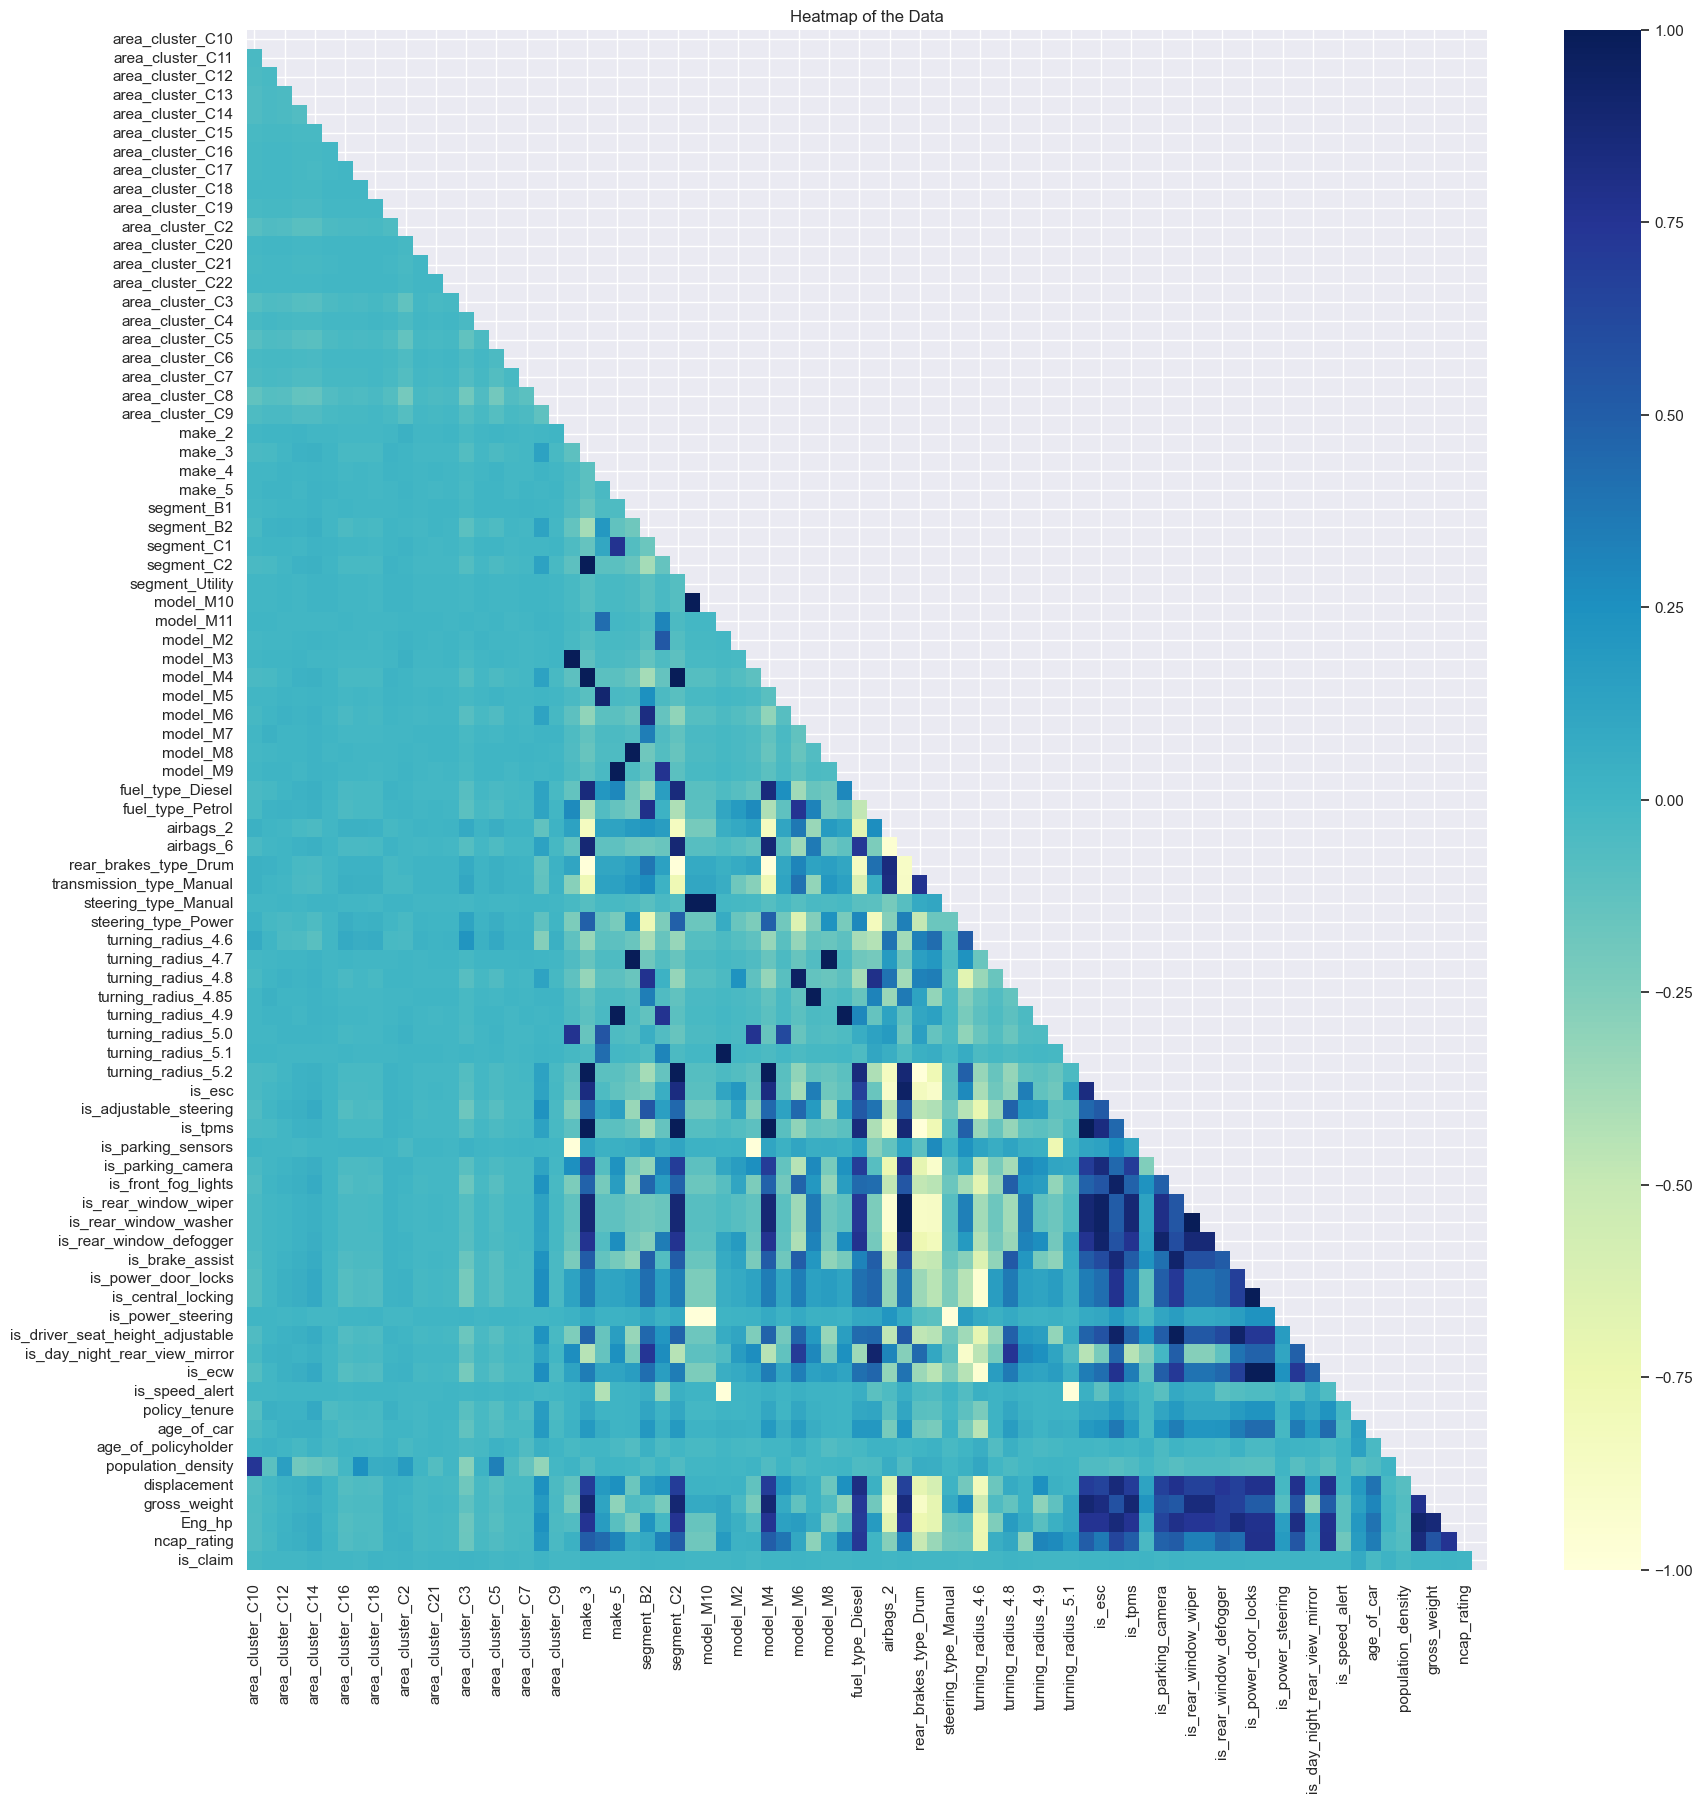

In [46]:
plt.figure(figsize =(20,20))
mask = np.triu(np.ones_like(df_comb.corr()))
sns.heatmap(df_comb.corr(), cmap="YlGnBu", mask = mask, fmt = '.1f')
plt.title("Heatmap of the Data")

### 2.3 Dissolution of Multicollinearity problem

#### Technique 1: Highly Correlated Columns elimination

- Multicollinearity is a condition in which there is a significant dependency or association between independent variables (also known as predictor variables) in a regression model. When multicollinearity occurs, it can impact the interpretability of the model. 

- In classification, we often deal with predictor variables (features) that may be correlated with each other. 
- Multicollinearity occurs when these features are highly interrelated, making it challenging to isolate their individual effects on the target class.

In [47]:
df_comb.shape

(58592, 82)

In [48]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

In [49]:
df_f1 = correlation(df_comb, 0.90)

In [50]:
df_f1.shape

(58592, 58)

<Axes: >

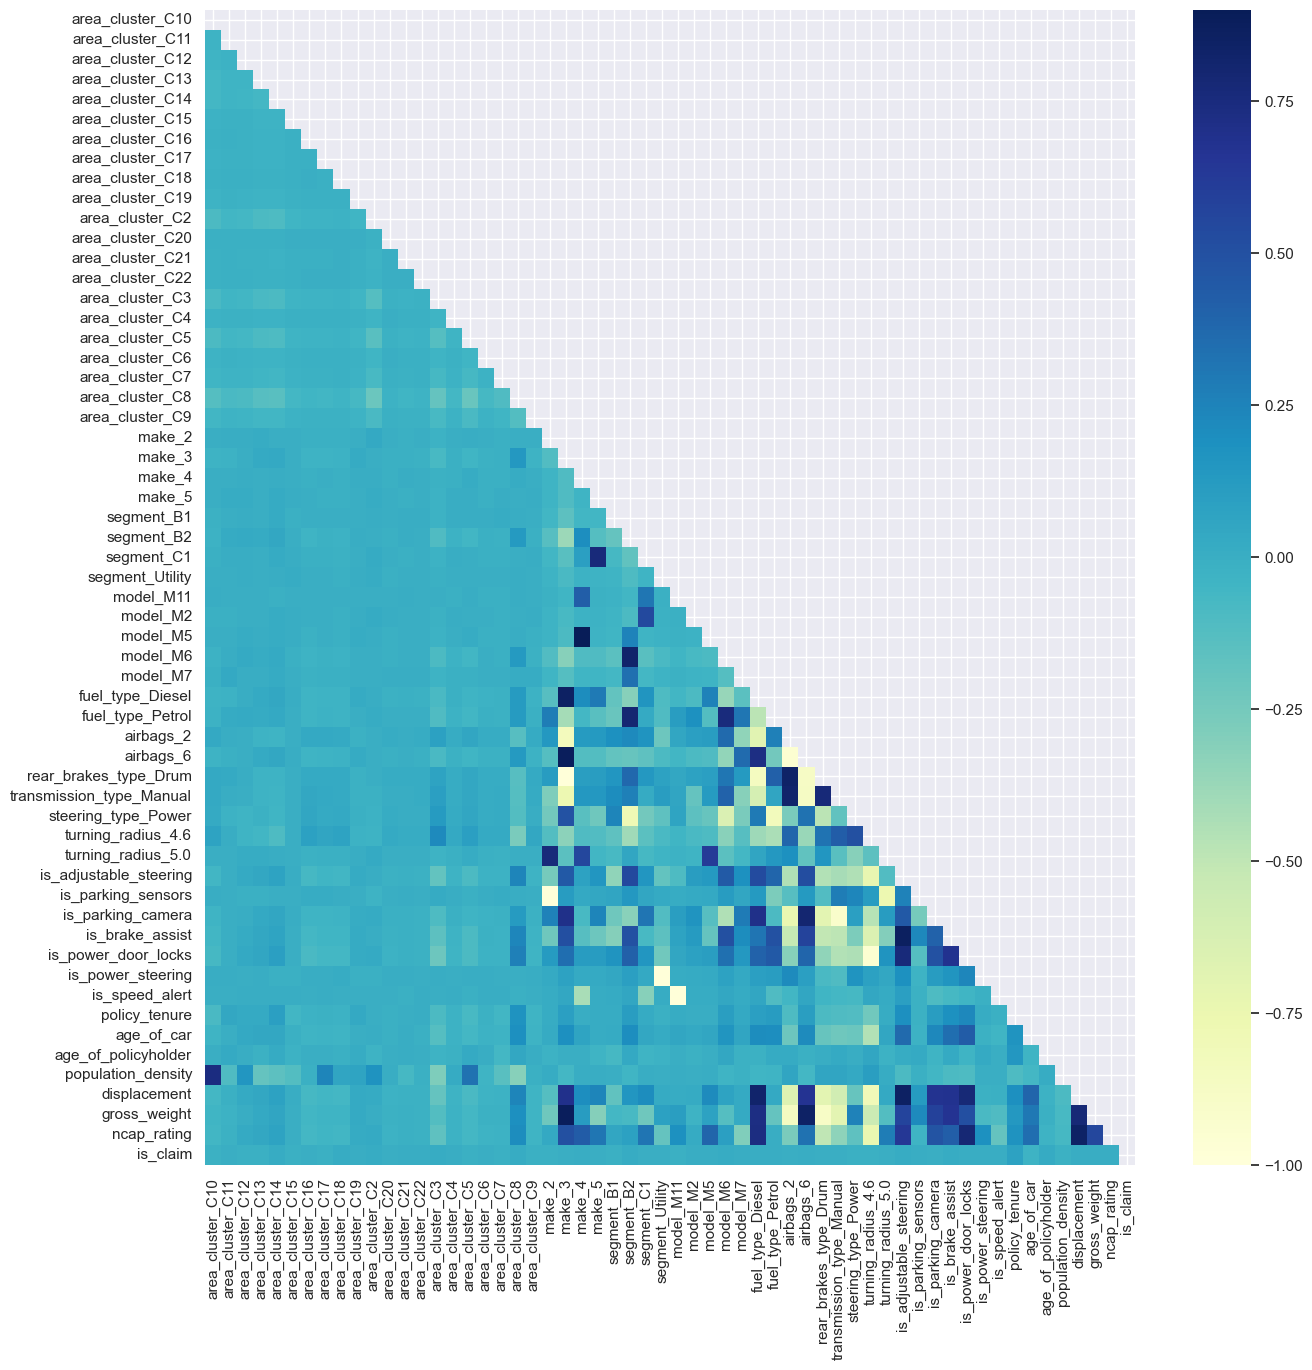

In [51]:
plt.figure(figsize =(15,15))
mask = np.triu(np.ones_like(df_f1.corr()))
sns.heatmap(df_f1.corr(), cmap="YlGnBu", mask = mask, fmt = '.1f')

#### Technique 2: Varience Inflation Factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 

In [53]:
X =add_constant(df_f1)
ds=pd.DataFrame([variance_inflation_factor(df_f1, i) 
               for i in range(df_f1.shape[1])],   
              index=df_f1.columns)

In [54]:
ds

0
area_cluster_C10          1.126181e+12
area_cluster_C11          2.142877e+10
area_cluster_C12          6.386273e+11
area_cluster_C13          2.250225e+11
area_cluster_C14          4.137817e+11
area_cluster_C15          1.436555e+13
area_cluster_C16          5.525889e+13
area_cluster_C17          7.940756e+11
area_cluster_C18          5.856436e+12
area_cluster_C19          2.063505e+12
area_cluster_C2           2.995395e+09
area_cluster_C20          1.580210e+13
area_cluster_C21          2.104486e+13
area_cluster_C22          5.929690e+12
area_cluster_C3           3.724276e+10
area_cluster_C4           3.688616e+08
area_cluster_C5           1.217087e+10
area_cluster_C6           1.124916e+12
area_cluster_C7           4.897879e+12
area_cluster_C8                    inf
area_cluster_C9                    inf
make_2                             inf
make_3                             inf
make_4                             inf
make_5                             inf
segment_B1                         inf
segment_B2                         inf
segment_C1                         inf
segment_Utility                    inf
model_M11                          inf
model_M2                           inf
model_M5                           inf
model_M6                           inf
model_M7                           inf
fuel_type_Diesel                   inf
fuel_type_Petrol                   inf
airbags_2                          inf
airbags_6                          inf
rear_brakes_type_Drum              inf
transmission_type_Manual           inf
steering_type_Power                inf
turning_radius_4.6                 inf
turning_radius_5.0                 inf
is_adjustable_steering             inf
is_parking_sensors                 inf
is_parking_camera                  inf
is_brake_assist                    inf
is_power_door_locks                inf
is_power_steering                  inf
is_speed_alert                     inf
policy_tenure             1.137226e+00
age_of_car                1.288886e+00
age_of_policyholder       1.046944e+00
population_density        1.083248e+05
displacement                       inf
gross_weight                       inf
ncap_rating                        inf
is_claim                  1.009615e+00

In [55]:
df_f2 = df_f1[["area_cluster_C8",'area_cluster_C2','area_cluster_C5','area_cluster_C3','make_3','segment_B2','model_M6','fuel_type_Diesel','airbags_2','rear_brakes_type_Drum',
              'transmission_type_Manual','turning_radius_4.6','policy_tenure','age_of_car','age_of_policyholder','population_density','gross_weight','ncap_rating','is_claim']]

In [56]:
df_f2.head()

area_cluster_C8  area_cluster_C2  area_cluster_C5  area_cluster_C3  make_3  \
0                0                0                0                0       0   
1                0                1                0                0       0   
2                0                0                0                1       0   
3                0                0                0                0       0   
4                0                0                1                0       0   

   segment_B2  model_M6  fuel_type_Diesel  airbags_2  rear_brakes_type_Drum  \
0           0         0                 0          1                      1   
1           0         0                 0          1                      1   
2           0         0                 0          1                      1   
3           0         0                 0          1                      1   
4           0         0                 0          1                      1   

   transmission_type_Manual  turning_radius_4.6  policy_tenure  age_of_car  \
0                         1                   1       0.515874        0.05   
1                         1                   1       0.672619        0.02   
2                         1                   1       0.841110        0.02   
3                         0                   0       0.900277        0.11   
4                         0                   0       0.596403        0.11   

   age_of_policyholder  population_density  gross_weight  ncap_rating  \
0             0.644231            0.064260      0.200299          0.0   
1             0.375000            0.365231      0.200299          0.0   
2             0.384615            0.051764      0.200299          0.0   
3             0.432692            0.291660      0.424514          0.4   
4             0.634615            0.470987      0.155456          0.4   

   is_claim  
0         0  
1         0  
2         0  
3         0  
4         0

In [57]:
df_f2.shape

(58592, 19)

In [58]:
X =add_constant(df_f2)
ds=pd.DataFrame([variance_inflation_factor(df_f2, i) 
               for i in range(df_f2.shape[1])],   
              index=df_f2.columns)

In [59]:
ds

0
area_cluster_C8             1.385906
area_cluster_C2             1.159272
area_cluster_C5             1.223163
area_cluster_C3             1.294043
make_3                    181.019271
segment_B2                 18.893862
model_M6                   23.938754
fuel_type_Diesel           82.359972
airbags_2                  58.502816
rear_brakes_type_Drum      83.660253
transmission_type_Manual   13.517336
turning_radius_4.6         23.349564
policy_tenure               1.116992
age_of_car                  1.285432
age_of_policyholder         1.041727
population_density          1.400177
gross_weight               48.020129
ncap_rating                71.332710
is_claim                    1.008963

In [60]:
df_f3 = df_f2[["area_cluster_C8",'area_cluster_C2','area_cluster_C5','area_cluster_C3','segment_B2','model_M6','airbags_2','transmission_type_Manual',
              'turning_radius_4.6','policy_tenure','age_of_car','age_of_policyholder','population_density','ncap_rating','is_claim']]

df_f3.shape

(58592, 15)

In [61]:
X =add_constant(df_f3)
ds=pd.DataFrame([variance_inflation_factor(df_f3, i) 
               for i in range(df_f3.shape[1])],   
              index=df_f3.columns)

In [62]:
ds

0
area_cluster_C8            1.751468
area_cluster_C2            1.307963
area_cluster_C5            1.385676
area_cluster_C3            1.385127
segment_B2                 4.893832
model_M6                   5.038185
airbags_2                 10.534768
transmission_type_Manual  10.784222
turning_radius_4.6         5.433668
policy_tenure              3.439280
age_of_car                 2.948365
age_of_policyholder       10.010983
population_density         2.779514
ncap_rating                5.420135
is_claim                   1.077124

<Axes: >

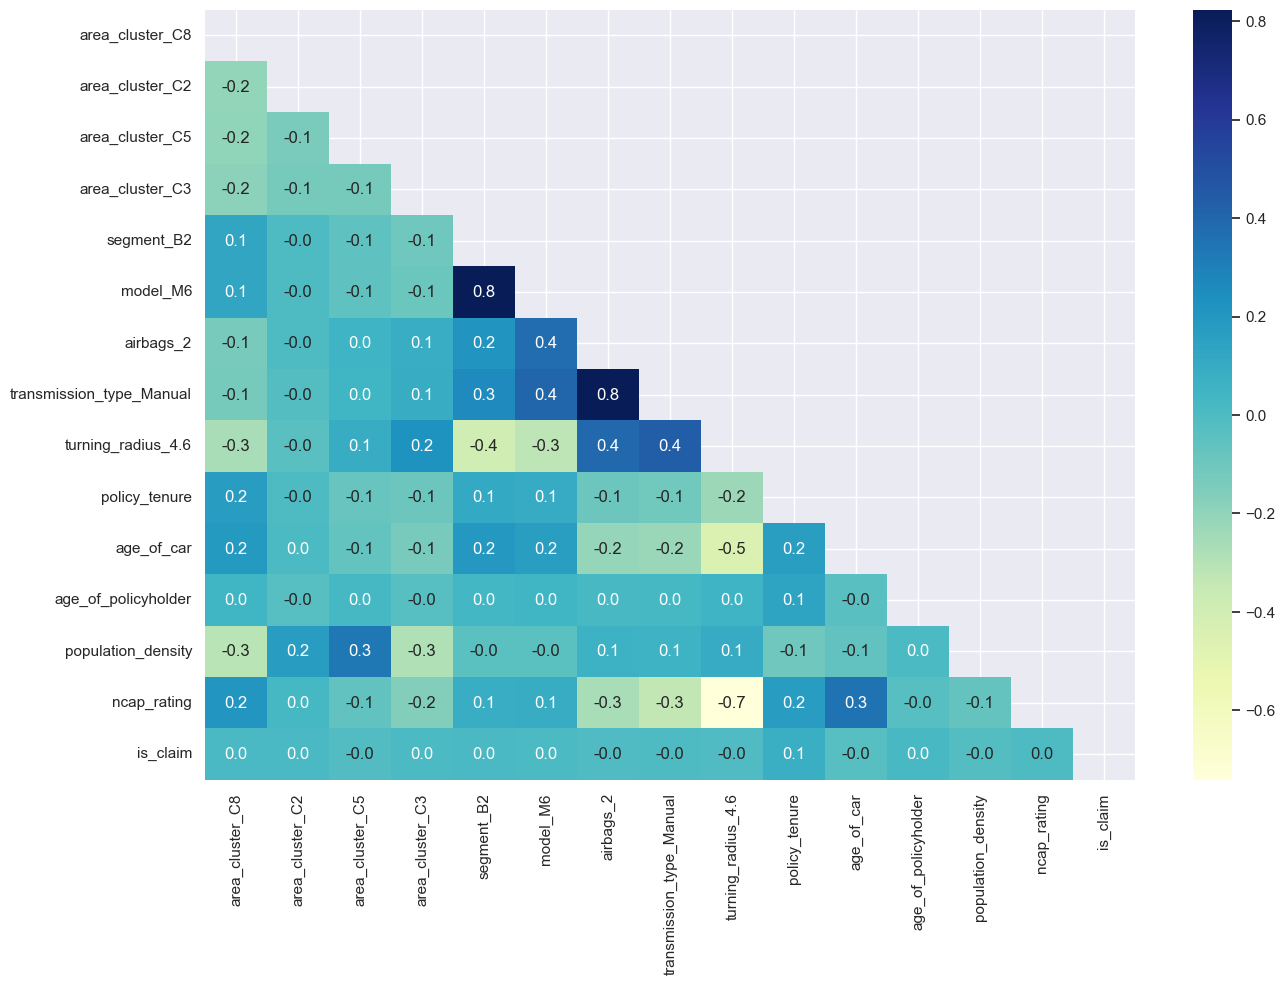

In [63]:
plt.figure(figsize =(15,10))
mask = np.triu(np.ones_like(df_f3.corr()))
sns.heatmap(df_f3.corr(), cmap="YlGnBu", mask = mask, fmt = '.1f', annot = True)

### Model Building

- We are going to build compairative models of Machine Learning using 8 algorithms. All these algorithms are used for classification model, and evaluate the performance of the model using test dataset by appling 7 evaluation indices.
- As the data is highly unbalanced we need to use resampling techniques, In this project we are going to use 3 resampling Techniques imblearn package those techniques are:
- **--------> Random Oversampling**
- **--------> SMOTE (Synthetic Minority Oversampling Technique)**
- **--------> Random Undersampling** 
- Each resampling technique will be use to model all 8 algorithms simultenously. The most suitable resampling technique and the model will be choose  as our final Model for Machine Learning.
- The 8 algorithms we are going to use are:
- **--------> Logistic Regression**
- **--------> Random Forest**
- **--------> Multilayer Perceptron (MLP)**
- **--------> Support Vector Machine (SVM)**
- **--------> Naive Bayes (NB)**
- **--------> Decision Tree (DT)**
- **--------> XG Boost**
- **--------> AdaBoost**


- This Model will also be revarified using cross validation technique.
- Finally the model will be ready for deployment

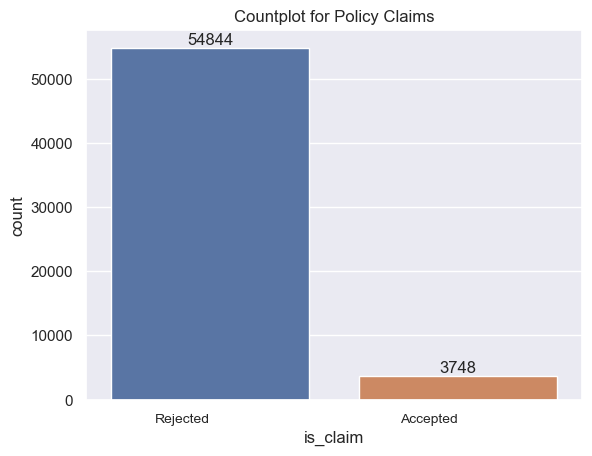

In [64]:
ax = sns.countplot(data, x = 'is_claim')
abs_values = data['is_claim'].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = abs_values)

xtick_loc = ax.get_xticks()
# plt.xticks(labels=('Rejected','Accepted'))
xtick_labels = ["Rejected","Accepted"]

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, ha = 'right', fontsize = 10)

# Specfiy axis labels and title
ax.set(title = "Countplot for Policy Claims")

plt.show()

In [65]:
X = df_f3.iloc[:, :-1]
y = df_f3.iloc[:, -1]

In [66]:
X.head()

area_cluster_C8  area_cluster_C2  area_cluster_C5  area_cluster_C3  \
0                0                0                0                0   
1                0                1                0                0   
2                0                0                0                1   
3                0                0                0                0   
4                0                0                1                0   

   segment_B2  model_M6  airbags_2  transmission_type_Manual  \
0           0         0          1                         1   
1           0         0          1                         1   
2           0         0          1                         1   
3           0         0          1                         0   
4           0         0          1                         0   

   turning_radius_4.6  policy_tenure  age_of_car  age_of_policyholder  \
0                   1       0.515874        0.05             0.644231   
1                   1       0.672619        0.02             0.375000   
2                   1       0.841110        0.02             0.384615   
3                   0       0.900277        0.11             0.432692   
4                   0       0.596403        0.11             0.634615   

   population_density  ncap_rating  
0            0.064260          0.0  
1            0.365231          0.0  
2            0.051764          0.0  
3            0.291660          0.4  
4            0.470987          0.4

In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

##### Spliting the data into Test and Train

In [68]:
from sklearn.model_selection import train_test_split
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101, stratify = Y)
    return X_train, X_test, Y_train, Y_test

In [69]:
X_train, X_test, Y_train, Y_test = split_data(X, y)

In [70]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(46873, 14) (11719, 14) (46873,) (11719,)


### 3.1 Model Building with Machine Learning Algorithm

### Resampling Techniques for Balancing the data

### Technique 1: Random Oversampling

In [71]:
from imblearn.over_sampling import RandomOverSampler

# Oversample the minority class
ros = RandomOverSampler(random_state=101)
X_resample_ro, y_resample_ro = ros.fit_resample(X_train, Y_train)

# Print the number of samples in each class before and after oversampling
print("Before oversampling:")
print(f"Majority class: {sum(Y_train == 0)}")
print(f"Minority class: {sum(Y_train == 1)}")

print("After oversampling:")
print(f"Majority class: {sum(y_resample_ro == 0)}")
print(f"Minority class: {sum(y_resample_ro == 1)}")

Before oversampling:
Majority class: 43875
Minority class: 2998
After oversampling:
Majority class: 43875
Minority class: 43875


### Measurement of Outcome using Efficiency Metrics

##### To measure the performance of the model we are going to use seven classifier efficiency measures.

- **Accuracy**: Accuracy measures how often the classifier correctly predicts the target class.
### Accuracy= (TP+TN)/ (TP+FP+TN+FN)
- **Sensitivity/ Recall**: Sensitivity (also known as recall) measures the proportion of actual positive cases correctly predicted by the model.
### Sensitivity=TP/(TP+FN)
- **Specificity**: Specificity measures the proportion of actual negative cases correctly predicted by the model.
### Specificity=TN/(FP+TN)
- **AUC (Area Under the Receiver Operating Characteristic Curve)**: AUC-ROC quantifies the model’s ability to distinguish between positive and negative classes across different probability thresholds.
- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the model.
### Precision =TP/(TP+FP)
- **F1-measure**: F1-score balances precision and recall. It considers both false positives and false negatives.
### F-measure= (2* Precision* Recall) / (Precision+Recall)
- **Kappa**: Kappa assesses the agreement between predicted and actual values, considering the possibility of random agreement.
### K=(Pr(a)-Pr(e))/(1-Pr(e)) 
Where: 
- Pr(a) represents the observed agreement between the raters, which is the proportion of cases where the raters agree.

- Pr(e) represents the expected agreement between the raters by chance. 

### 1.1 Logistic Regression(LR)

In [72]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression(random_state = 101)
clf.fit(X_resample_ro, y_resample_ro)
y_pred_lr = clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# Compute evaluation metrics
accuracy_ol = accuracy_score(Y_test, y_pred_lr) 
precision_ol = precision_score(Y_test, y_pred_lr, average='weighted')
recall_ol = recall_score(Y_test, y_pred_lr, average='weighted')
f1_ol = f1_score(Y_test, y_pred_lr, average='weighted')
prob_lr = clf.predict_proba(X_test)
logloss_ol = log_loss(Y_test, clf.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lr).ravel()

# Calculate specificity
specificity_ol = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ol = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Logistic Regression")
print('************'*3)

print('Accuracy:', accuracy_ol)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ol)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ol)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ol)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ol)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ol)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ol )

Efficiency Metrics for Logistic Regression
************************************
Accuracy: 0.5664305828142333
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8952807396295293
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5664305828142333
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6734703282734371
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6704793524440272
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5660497766432674
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03674477791146742


<Axes: title={'center': 'Confusion Matrix for LR'}, xlabel='Predicted label', ylabel='True label'>

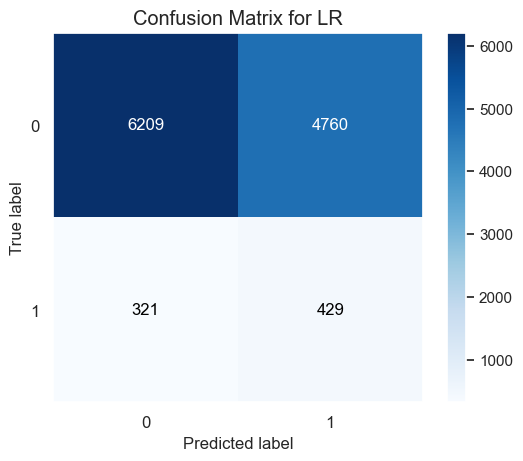

In [74]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_lr, normalize=False, title = 'Confusion Matrix for LR')

### 1.2 Random Forest (RF)

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_resample_ro, y_resample_ro)

y_pred_rf = rf_classifier.predict(X_test)

In [76]:
# Compute evaluation metrics
accuracy_or = accuracy_score(Y_test, y_pred_rf) 
precision_or = precision_score(Y_test, y_pred_rf, average='weighted')
recall_or = recall_score(Y_test, y_pred_rf, average='weighted')
f1_or = f1_score(Y_test, y_pred_rf, average='weighted')
prob_rf = rf_classifier.predict_proba(X_test)
logloss_or = log_loss(Y_test, rf_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_rf).ravel()

# Calculate specificity
specificity_or = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_or = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Random Forest")
print('************'*3)

print('Accuracy:', accuracy_or)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_or)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_or)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_or)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_or)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_or)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_or )

Efficiency Metrics for Random Forest
************************************
Accuracy: 0.9206416929772165
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8814513837044262
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.9206416929772165
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.8995257642097325
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.4460035054488388
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.9820402953778832
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.007055865663227915


<Axes: title={'center': 'Confusion Matrix for RF'}, xlabel='Predicted label', ylabel='True label'>

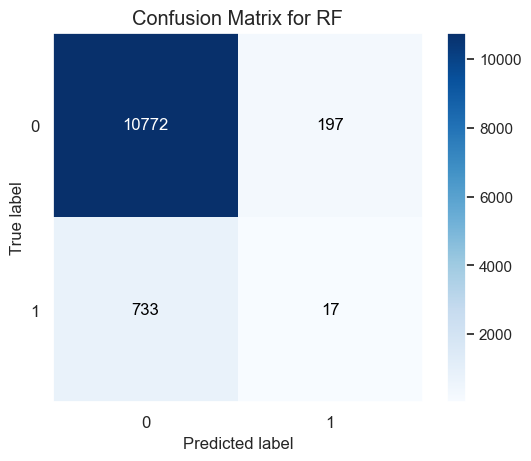

In [77]:

skplt.metrics.plot_confusion_matrix(Y_test, y_pred_rf, normalize=False, title = 'Confusion Matrix for RF')

### 1.3 Multilayer Perceptron (MLP)

In [78]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,))
nn_model.fit(X_resample_ro, y_resample_ro)
y_pred_nn = nn_model.predict(X_test)

In [79]:
# Compute evaluation metrics
accuracy_om = accuracy_score(Y_test, y_pred_nn) 
precision_om = precision_score(Y_test, y_pred_nn, average='weighted')
recall_om = recall_score(Y_test, y_pred_nn, average='weighted')
f1_om = f1_score(Y_test, y_pred_nn, average='weighted')
prob_mlp = nn_model.predict_proba(X_test)
logloss_om = log_loss(Y_test, nn_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nn).ravel()

# Calculate specificity
specificity_om = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_om = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for MLP")
print('************'*3)

print('Accuracy:', accuracy_om)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_om)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_om)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_om)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_om)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_om)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_om )

Efficiency Metrics for MLP
************************************
Accuracy: 0.5800836248826692
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.9013876068805167
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5800836248826692
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6842835842045264
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.640446115416289
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5774455283070471
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.052987645430693835


<Axes: title={'center': 'Confusion Matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

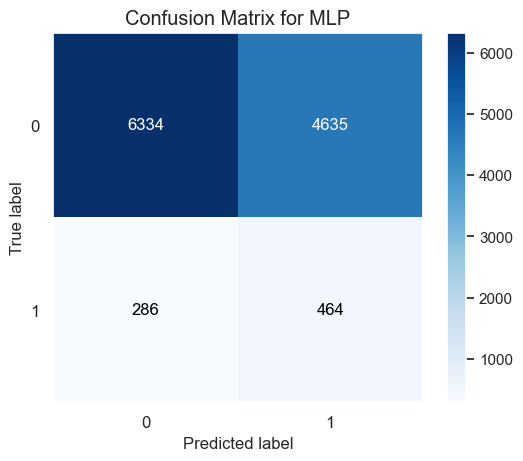

In [80]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nn, normalize=False, title = 'Confusion Matrix for MLP')

### 1.4 Support Vector Machine (SVM)

In [84]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_resample_ro, y_resample_ro)

y_pred_svm = svm_classifier.predict(X_test)

In [85]:
# Compute evaluation metrics
accuracy_os = accuracy_score(Y_test, y_pred_svm) 
precision_os = precision_score(Y_test, y_pred_svm, average='weighted')
recall_os = recall_score(Y_test, y_pred_svm, average='weighted')
f1_os = f1_score(Y_test, y_pred_svm, average='weighted')
# logloss_os = log_loss(Y_test, svm_classifier.predict_proba(X_test))
logloss_os = 0.6749435308388512

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_svm).ravel()

# Calculate specificity
specificity_os = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_os = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for SVM")
print('************'*3)

print('Accuracy:', accuracy_os)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_os)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_os)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_os)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_os)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_os)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_os )

Efficiency Metrics for SVM
************************************
Accuracy: 0.544244389453025
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8944185072672186
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5442443894530249
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6547232666678149
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6749435308388512
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5415261190628133
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.031943319933860424


<Axes: title={'center': 'Confusion Matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

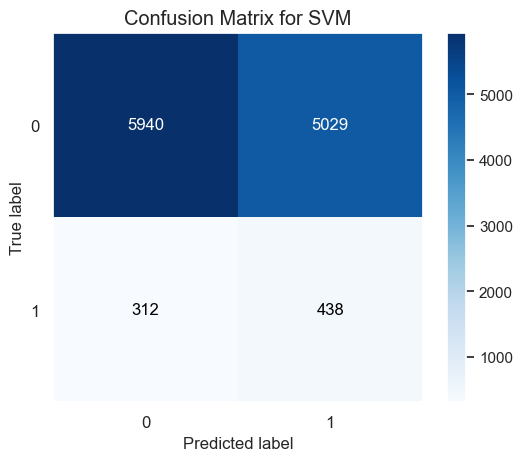

In [86]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_svm, normalize=False, title = 'Confusion Matrix for SVM')

###  2.5 Naive Bayes (NB)

In [87]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_resample_ro, y_resample_ro)

y_pred_nb = nb_classifier.predict(X_test)

In [88]:
# Compute evaluation metrics
accuracy_on = accuracy_score(Y_test, y_pred_nb) 
precision_on = precision_score(Y_test, y_pred_nb, average='weighted')
recall_on = recall_score(Y_test, y_pred_nb, average='weighted')
f1_on = f1_score(Y_test, y_pred_nb, average='weighted')
prob_nb = nb_classifier.predict_proba(X_test)
logloss_on = log_loss(Y_test, nb_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nb).ravel()

# Calculate specificity
specificity_on = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_on = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for NB")
print('************'*3)

print('Accuracy:', accuracy_on)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_on)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_on)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_on)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_on)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_on)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_on )

Efficiency Metrics for NB
************************************
Accuracy: 0.5458656881986518
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8954449184917754
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5458656881986518
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6560073265222434
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.684472751278804
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5427112772358464
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.034318686121961164


<Axes: title={'center': 'Confusion Matrix for NB'}, xlabel='Predicted label', ylabel='True label'>

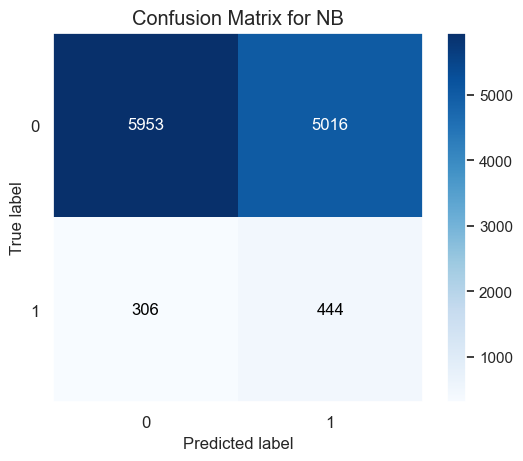

In [89]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=False, title = 'Confusion Matrix for NB')

### 1.6 Decision Tree (DT)

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resample_ro, y_resample_ro)

y_pred_dt = dt_model.predict(X_test)

In [91]:
# Compute evaluation metrics
accuracy_od = accuracy_score(Y_test, y_pred_dt) 
precision_od = precision_score(Y_test, y_pred_dt, average='weighted')
recall_od = recall_score(Y_test, y_pred_dt, average='weighted')
f1_od = f1_score(Y_test, y_pred_dt, average='weighted')
prob_dt = dt_model.predict_proba(X_test)
logloss_od = log_loss(Y_test, dt_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_dt).ravel()

# Calculate specificity
specificity_od = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_od = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for DT")
print('************'*3)

print('Accuracy:', accuracy_od)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_od)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_od)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_od)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_od)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_od)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_od )

Efficiency Metrics for DT
************************************
Accuracy: 0.8794265722331257
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8824224698917335
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.8794265722331257
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.8809176855669095
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 4.345906838366972
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.933722308323457
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.018582450154479582


<Axes: title={'center': 'Confusion Matrix for DT'}, xlabel='Predicted label', ylabel='True label'>

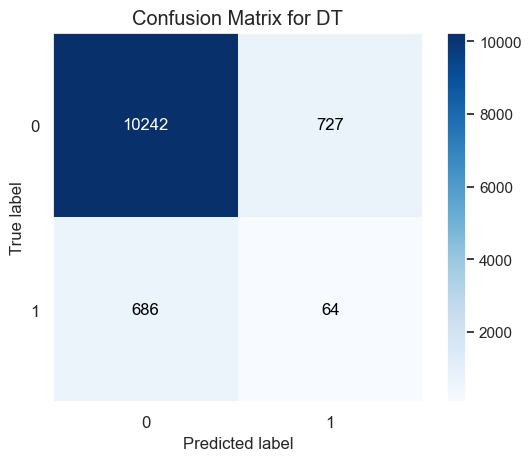

In [92]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_dt, normalize=False, title = 'Confusion Matrix for DT')

### 1.7 XG Boost

In [93]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_resample_ro, y_resample_ro)

y_pred_xgb = xgb_model.predict(X_test)

In [94]:
# Compute evaluation metrics
accuracy_ox = accuracy_score(Y_test, y_pred_xgb) 
precision_ox = precision_score(Y_test, y_pred_xgb, average='weighted')
recall_ox = recall_score(Y_test, y_pred_xgb, average='weighted')
f1_ox = f1_score(Y_test, y_pred_xgb, average='weighted')
prob_xgb = xgb_model.predict_proba(X_test)
logloss_ox = log_loss(Y_test, xgb_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_xgb).ravel()

# Calculate specificity
specificity_ox = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ox = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for XGB")
print('************'*3)

print('Accuracy:', accuracy_ox)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ox)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ox)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ox)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ox)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ox)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ox )

Efficiency Metrics for XGB
************************************
Accuracy: 0.5530335352845805
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.9054621451741746
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5530335352845805
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6610878572675811
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6396630906847449
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5445345975020512
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.05613169821257965


<Axes: title={'center': 'Confusion Matrix for XGB'}, xlabel='Predicted label', ylabel='True label'>

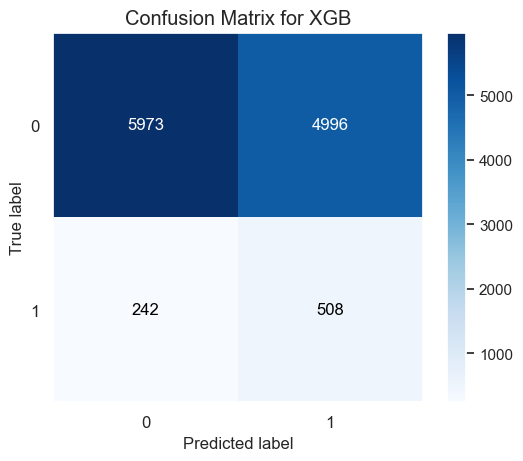

In [95]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_xgb, normalize=False, title = 'Confusion Matrix for XGB')

###  1.8 AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model_abc = abc.fit(X_resample_ro, y_resample_ro)

y_pred_ab = model_abc.predict(X_test)

In [97]:
# Compute evaluation metrics
accuracy_oa = accuracy_score(Y_test, y_pred_ab) 
precision_oa = precision_score(Y_test, y_pred_ab, average='weighted')
recall_oa = recall_score(Y_test, y_pred_ab, average='weighted')
f1_oa = f1_score(Y_test, y_pred_ab, average='weighted')
prob_ab = model_abc.predict_proba(X_test)
logloss_oa = log_loss(Y_test, model_abc.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ab).ravel()

# Calculate specificity
specificity_oa = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_oa = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for ADB")
print('************'*3)

print('Accuracy:', accuracy_oa)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_oa)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_oa)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_oa)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_oa)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_oa)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_oa )

Efficiency Metrics for ADB
************************************
Accuracy: 0.533407287311204
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.9038246109669642
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.533407287311204
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6441505938266897
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6910799837934855
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5235664144406965
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.04905400602828564


<Axes: title={'center': 'Confusion Matrix for ADB'}, xlabel='Predicted label', ylabel='True label'>

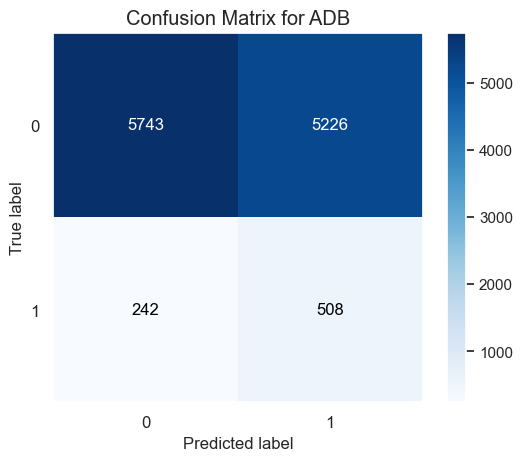

In [98]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_ab, normalize=False, title = 'Confusion Matrix for ADB')

### ROC_AUC curve for Models using Random OverSampling

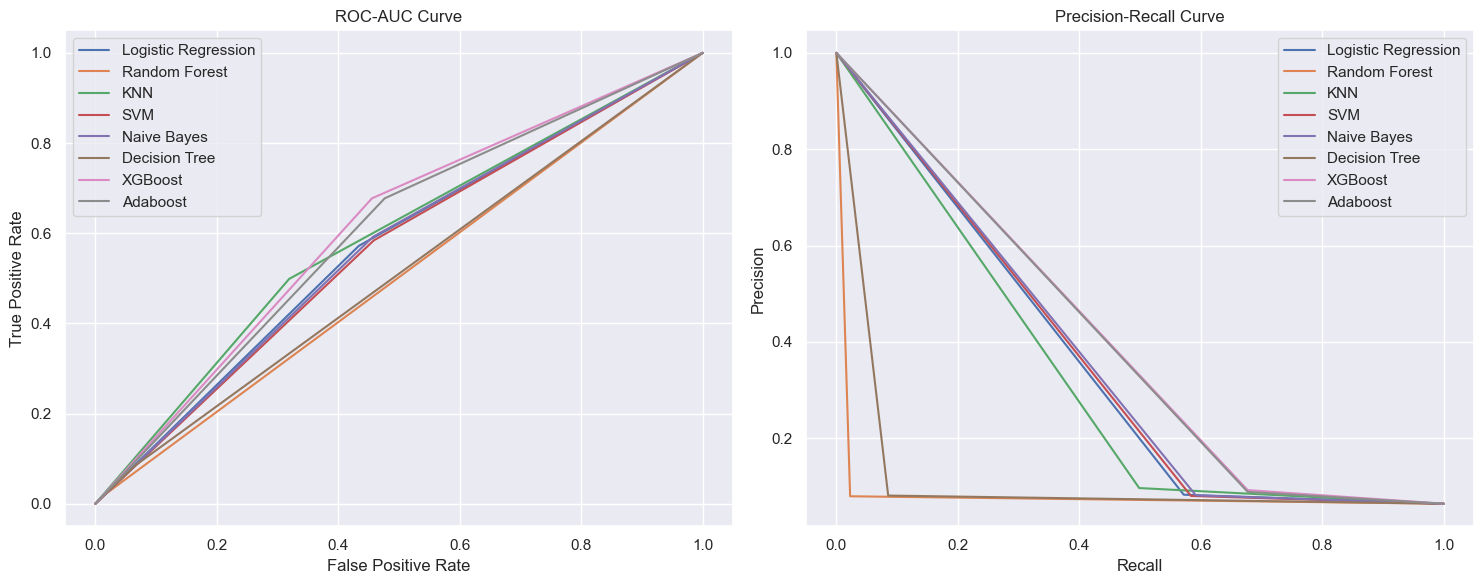

In [99]:

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# ROC-AUC curve
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)
fpr_nn, tpr_nn, _ = roc_curve(Y_test, y_pred_nn)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_pred_svm)
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_pred_xgb)
fpr_ab, tpr_ab, _ = roc_curve(Y_test, y_pred_ab)




# Precision-recall curve
precision_lr, recall_lr, _ = precision_recall_curve(Y_test, y_pred_lr)
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, y_pred_rf)
precision_nn, recall_nn, _ = precision_recall_curve(Y_test, y_pred_nn)
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, y_pred_svm)
precision_nb, recall_nb, _ = precision_recall_curve(Y_test, y_pred_nb)
precision_dt, recall_dt, _ = precision_recall_curve(Y_test, y_pred_dt)
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, y_pred_xgb)
precision_ab, recall_ab, _ = precision_recall_curve(Y_test, y_pred_ab)

# ROC-AUC curve

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nn, tpr_nn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_ab, tpr_ab, label='Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

# Precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_nn, precision_nn, label='KNN')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_ab, precision_ab, label='Adaboost')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

### Technique 2: SMOTENC Resampling

In [100]:
# Balancing the dataset using SMOTE Technique
from imblearn.over_sampling import SMOTENC
sm_nc = SMOTENC(categorical_features=[0, 1], random_state = 101)
X_resample_sm, y_resample_sm = sm_nc.fit_resample(X_train, Y_train)

# Print the number of samples in each class before and after oversampling
print("Before oversampling:")
print(f"Majority class: {sum(Y_train == 0)}")
print(f"Minority class: {sum(Y_train == 1)}")

print("After oversampling:")
print(f"Majority class: {sum(y_resample_sm == 0)}")
print(f"Minority class: {sum(y_resample_sm == 1)}")

Before oversampling:
Majority class: 43875
Minority class: 2998
After oversampling:
Majority class: 43875
Minority class: 43875


### 2.1 Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression(random_state = 101)
clf.fit(X_resample_sm, y_resample_sm)
y_pred_lr = clf.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# Compute evaluation metrics
accuracy_ml = accuracy_score(Y_test, y_pred_lr) 
precision_ml = precision_score(Y_test, y_pred_lr, average='weighted')
recall_ml = recall_score(Y_test, y_pred_lr, average='weighted')
f1_ml = f1_score(Y_test, y_pred_lr, average='weighted')
prob_lr = clf.predict_proba(X_test)
logloss_ml = log_loss(Y_test, clf.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lr).ravel()

# Calculate specificity
specificity_ml = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ml = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Logistic Regression")
print('************'*3)

print('Accuracy:', accuracy_ml)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ml)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ml)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ml)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ml)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ml)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ml )

Efficiency Metrics for Logistic Regression
************************************
Accuracy: 0.5730864408225957
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8954900014630909
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5730864408225957
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6789879609518759
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6696079452129194
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5734342237213966
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03817574104603955


<Axes: title={'center': 'Confusion Matrix for LR'}, xlabel='Predicted label', ylabel='True label'>

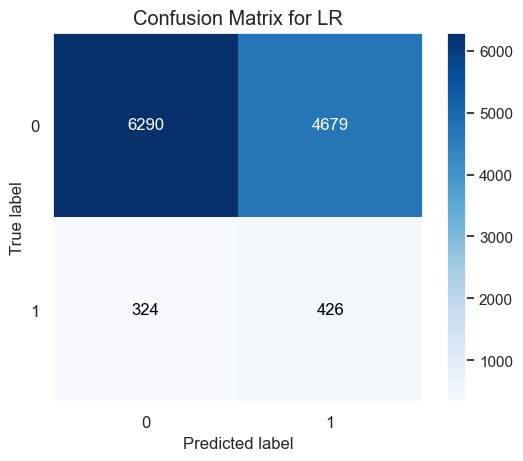

In [103]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_lr, normalize=False, title = 'Confusion Matrix for LR')

### 2.2 Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_resample_sm, y_resample_sm)

y_pred_rf = rf_classifier.predict(X_test)

In [105]:
# Compute evaluation metrics
accuracy_mr = accuracy_score(Y_test, y_pred_rf) 
precision_mr = precision_score(Y_test, y_pred_rf, average='weighted')
recall_mr = recall_score(Y_test, y_pred_rf, average='weighted')
f1_mr = f1_score(Y_test, y_pred_rf, average='weighted')
prob_rf = rf_classifier.predict_proba(X_test)
logloss_mr = log_loss(Y_test, rf_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_rf).ravel()

# Calculate specificity
specificity_mr = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_mr = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Random Forest")
print('************'*3)

print('Accuracy:', accuracy_mr)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_mr)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_mr)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_mr)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_mr)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_mr)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_mr )

Efficiency Metrics for Random Forest
************************************
Accuracy: 0.8821571806468129
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8835321737964802
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.8821571806468129
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.8828431084180047
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.39402932752706754
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.9361837906828334
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.027855084266793548


<Axes: title={'center': 'Confusion Matrix for RF'}, xlabel='Predicted label', ylabel='True label'>

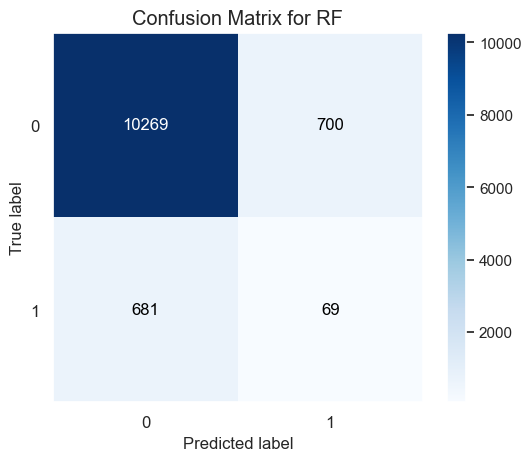

In [106]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_rf, normalize=False, title = 'Confusion Matrix for RF')

### 2.3 Multilayer Perceptron

In [107]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,))
nn_model.fit(X_resample_sm, y_resample_sm)

y_pred_nn = nn_model.predict(X_test)

In [108]:
# Compute evaluation metrics
accuracy_mm = accuracy_score(Y_test, y_pred_nn) 
precision_mm = precision_score(Y_test, y_pred_nn, average='weighted')
recall_mm = recall_score(Y_test, y_pred_nn, average='weighted')
f1_mm = f1_score(Y_test, y_pred_nn, average='weighted')
prob_mlp = nn_model.predict_proba(X_test)
logloss_mm = log_loss(Y_test, nn_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nn).ravel()

# Calculate specificity
specificity_mm = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_mm = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for MLP")
print('************'*3)

print('Accuracy:', accuracy_mm)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_mm)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_mm)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_mm)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_mm)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_mm)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_mm )

Efficiency Metrics for MLP
************************************
Accuracy: 0.5911767215632733
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8966063261383659
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5911767215632733
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6936978136192059
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.645873077815364
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5931260825964081
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.04366167303124296


<Axes: title={'center': 'Confusion Matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

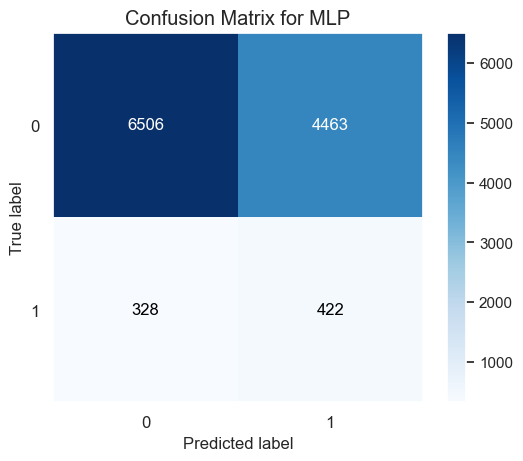

In [109]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nn, normalize=False, title = 'Confusion Matrix for MLP')

### 2.4 Support Vector Machining

In [110]:
from sklearn.svm import SVC

svm_classifier = SVC(probability = True, kernel='linear')
svm_classifier.fit(X_resample_sm, y_resample_sm)

y_pred_svm = svm_classifier.predict(X_test)

In [111]:
# Compute evaluation metrics
accuracy_ms = accuracy_score(Y_test, y_pred_svm) 
precision_ms = precision_score(Y_test, y_pred_svm, average='weighted')
recall_ms = recall_score(Y_test, y_pred_svm, average='weighted')
f1_ms = f1_score(Y_test, y_pred_svm, average='weighted')
logloss_ms = log_loss(Y_test, svm_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_svm).ravel()

# Calculate specificity
specificity_ms = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ms = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for SVM")
print('************'*3)

print('Accuracy:', accuracy_ms)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ms)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ms)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ms)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ms)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ms)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ms )

Efficiency Metrics for SVM
************************************
Accuracy: 0.5454390306340131
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8946804274002724
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5454390306340131
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6557238809838677
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.674191120172532
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5427112772358464
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03264613115324904


<Axes: title={'center': 'Confusion Matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

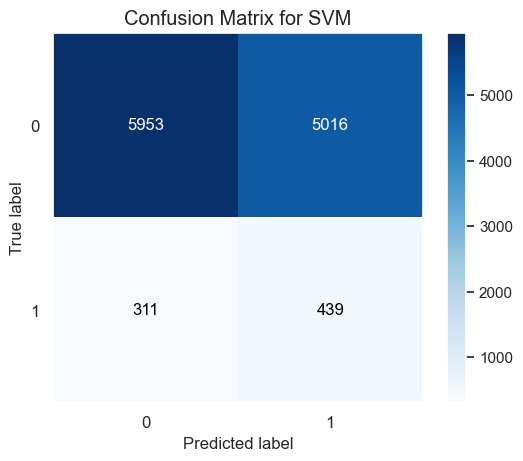

In [112]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_svm, normalize=False, title = 'Confusion Matrix for SVM')

### 2.5 Naive Bayes (NB)

In [113]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_resample_sm, y_resample_sm)

y_pred_nb = nb_classifier.predict(X_test)

In [114]:
# Compute evaluation metrics
accuracy_mn = accuracy_score(Y_test, y_pred_nb) 
precision_mn = precision_score(Y_test, y_pred_nb, average='weighted')
recall_mn = recall_score(Y_test, y_pred_nb, average='weighted')
f1_mn = f1_score(Y_test, y_pred_nb, average='weighted')
prob_nb = nb_classifier.predict_proba(X_test)
logloss_mn = log_loss(Y_test, nb_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nb).ravel()

# Calculate specificity
specificity_mn = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_mn = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for NB")
print('************'*3)

print('Accuracy:', accuracy_mn)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_mn)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_mn)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_mn)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_mn)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_mn)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_mn )

Efficiency Metrics for NB
************************************
Accuracy: 0.5588360781636659
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.894414789384368
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5588360781636659
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6671733603565063
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6792247491306562
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5580271674719665
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.033768827577724855


<Axes: title={'center': 'Confusion Matrix for NB'}, xlabel='Predicted label', ylabel='True label'>

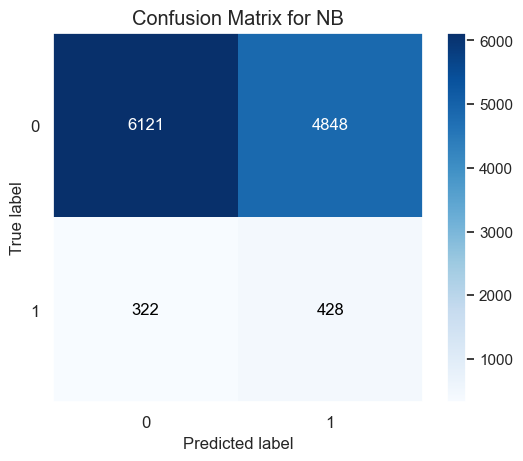

In [115]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=False, title = 'Confusion Matrix for NB')

### 2.6 Decision Tree (DT)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resample_sm, y_resample_sm)

y_pred_dt = dt_model.predict(X_test)

In [117]:
# Compute evaluation metrics
accuracy_md = accuracy_score(Y_test, y_pred_dt) 
precision_md = precision_score(Y_test, y_pred_dt, average='weighted')
recall_md = recall_score(Y_test, y_pred_dt, average='weighted')
f1_md = f1_score(Y_test, y_pred_dt, average='weighted')
prob_dt = dt_model.predict_proba(X_test)
logloss_md = log_loss(Y_test, dt_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_dt).ravel()

# Calculate specificity
specificity_md = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_md = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for DT")
print('************'*3)

print('Accuracy:', accuracy_md)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_md)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_md)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_md)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_md)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_md)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_md )

Efficiency Metrics for DT
************************************
Accuracy: 0.8606536393890264
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8830651927875448
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.8606536393890264
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.8715019109811795
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 5.02255192289686
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.9115689670890692
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.023154110670590998


<Axes: title={'center': 'Confusion Matrix for DT'}, xlabel='Predicted label', ylabel='True label'>

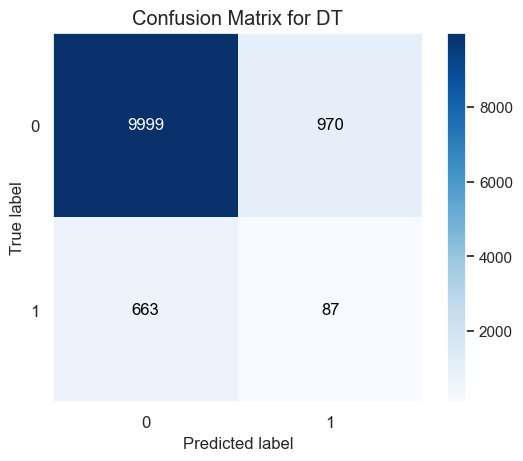

In [118]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_dt, normalize=False, title = 'Confusion Matrix for DT')

### 2.7 XGBoost

In [119]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_resample_sm, y_resample_sm)

y_pred_xgb = xgb_model.predict(X_test)

In [120]:
# Compute evaluation metrics
accuracy_mx = accuracy_score(Y_test, y_pred_xgb) 
precision_mx = precision_score(Y_test, y_pred_xgb, average='weighted')
recall_mx = recall_score(Y_test, y_pred_xgb, average='weighted')
f1_mx = f1_score(Y_test, y_pred_xgb, average='weighted')
prob_xgb = xgb_model.predict_proba(X_test)
logloss_mx = log_loss(Y_test, xgb_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_xgb).ravel()

# Calculate specificity
specificity_mx = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_mx = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for XGB")
print('************'*3)

print('Accuracy:', accuracy_mx)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_mx)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_mx)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_mx)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_mx)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_mx)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_mx )

Efficiency Metrics for XGB
************************************
Accuracy: 0.883351821827801
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8893633929307919
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.883351821827801
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.886316954636626
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.42719490828808504
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.933722308323457
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.07626789435211756


<Axes: title={'center': 'Confusion Matrix for XGB'}, xlabel='Predicted label', ylabel='True label'>

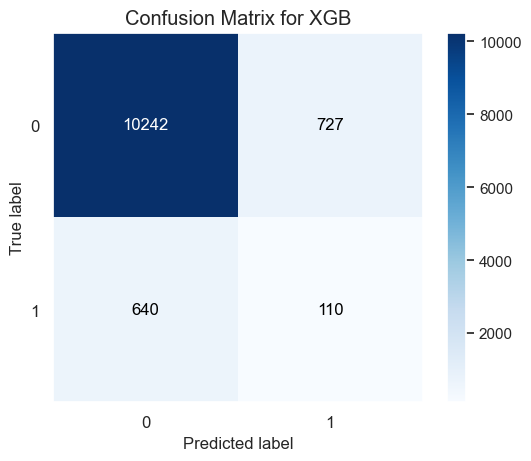

In [121]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_xgb, normalize=False, title = 'Confusion Matrix for XGB')

### 2.8 Adaboost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model_abc = abc.fit(X_resample_sm, y_resample_sm)

y_pred_ab = model_abc.predict(X_test)

In [123]:
# Compute evaluation metrics
accuracy_ma = accuracy_score(Y_test, y_pred_ab) 
precision_ma = precision_score(Y_test, y_pred_ab, average='weighted')
recall_ma = recall_score(Y_test, y_pred_ab, average='weighted')
f1_ma = f1_score(Y_test, y_pred_ab, average='weighted')
prob_ab = model_abc.predict_proba(X_test)
logloss_ma = log_loss(Y_test, model_abc.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ab).ravel()

# Calculate specificity
specificity_ma = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ma = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for ADB")
print('************'*3)

print('Accuracy:', accuracy_ma)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ma)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ma)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ma)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ma)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ma)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ma )

Efficiency Metrics for ADB
************************************
Accuracy: 0.6539807150780783
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8936692999551635
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.6539807150780783
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.7422767444606453
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6889197565807417
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.6663323912845291
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.04612720948137057


<Axes: title={'center': 'Confusion Matrix for ADB'}, xlabel='Predicted label', ylabel='True label'>

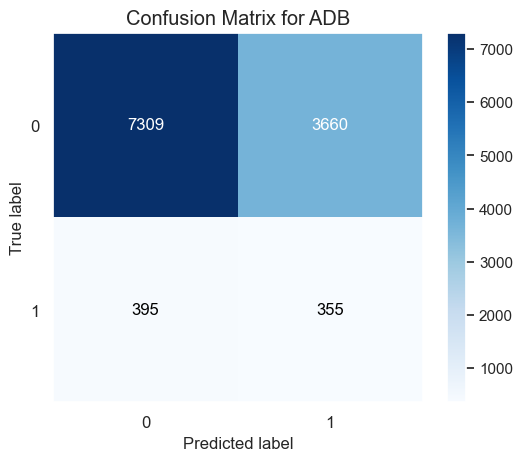

In [124]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_ab, normalize=False, title = 'Confusion Matrix for ADB')

### ROC_AUC curve for Models using SMOTE Techniques

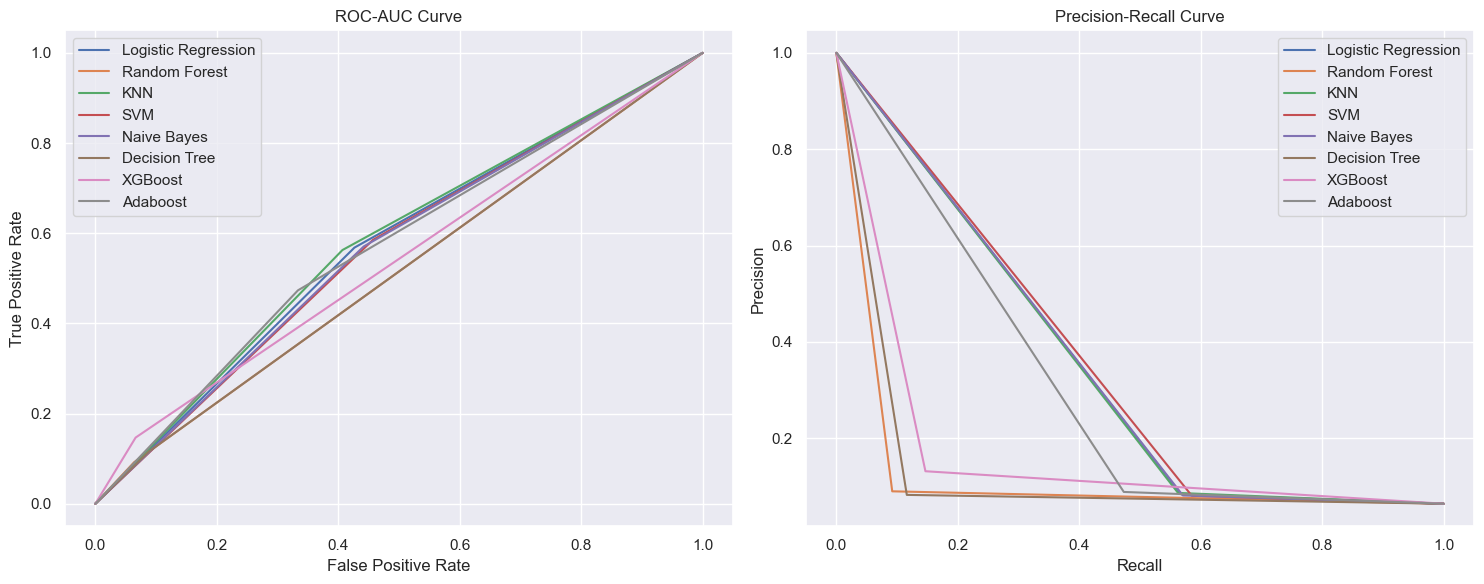

In [125]:

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# ROC-AUC curve
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)
fpr_nn, tpr_nn, _ = roc_curve(Y_test, y_pred_nn)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_pred_svm)
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_pred_xgb)
fpr_ab, tpr_ab, _ = roc_curve(Y_test, y_pred_ab)




# Precision-recall curve
precision_lr, recall_lr, _ = precision_recall_curve(Y_test, y_pred_lr)
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, y_pred_rf)
precision_nn, recall_nn, _ = precision_recall_curve(Y_test, y_pred_nn)
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, y_pred_svm)
precision_nb, recall_nb, _ = precision_recall_curve(Y_test, y_pred_nb)
precision_dt, recall_dt, _ = precision_recall_curve(Y_test, y_pred_dt)
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, y_pred_xgb)
precision_ab, recall_ab, _ = precision_recall_curve(Y_test, y_pred_ab)

# ROC-AUC curve

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nn, tpr_nn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_ab, tpr_ab, label='Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

# Precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_nn, precision_nn, label='KNN')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_ab, precision_ab, label='Adaboost')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

### Technique 3:  Random Under Sampler

In [126]:
from imblearn.under_sampling import RandomUnderSampler

# Oversample the minority class
rus = RandomUnderSampler(random_state=101)
X_resample_ru, y_resample_ru = rus.fit_resample(X_train, Y_train)

# Print the number of samples in each class before and after oversampling
print("Before oversampling:")
print(f"Majority class: {sum(Y_train == 0)}")
print(f"Minority class: {sum(Y_train == 1)}")

print("After oversampling:")
print(f"Majority class: {sum(y_resample_ru == 0)}")
print(f"Minority class: {sum(y_resample_ru == 1)}")

Before oversampling:
Majority class: 43875
Minority class: 2998
After oversampling:
Majority class: 2998
Minority class: 2998


### 3.1 Logistic Regreassion

In [127]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression(random_state = 101)
clf.fit(X_resample_ru, y_resample_ru)
y_pred_lr = clf.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# Compute evaluation metrics
accuracy_ul = accuracy_score(Y_test, y_pred_lr) 
precision_ul = precision_score(Y_test, y_pred_lr, average='weighted')
recall_ul = recall_score(Y_test, y_pred_lr, average='weighted')
f1_ul = f1_score(Y_test, y_pred_lr, average='weighted')
prob_lr = clf.predict_proba(X_test)
logloss_ul = log_loss(Y_test, clf.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lr).ravel()

# Calculate specificity
specificity_ul = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ul = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Logistic Regression")
print('************'*3)

print('Accuracy:', accuracy_ul)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ul)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ul)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ul)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ul)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ul)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ul )

Efficiency Metrics for Logistic Regression
************************************
Accuracy: 0.5656625991978838
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8936758454507057
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5656625991978838
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6729737297898578
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6719314983276004
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5662321086698878
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03296030980697776


<Axes: title={'center': 'Confusion Matrix for LR'}, xlabel='Predicted label', ylabel='True label'>

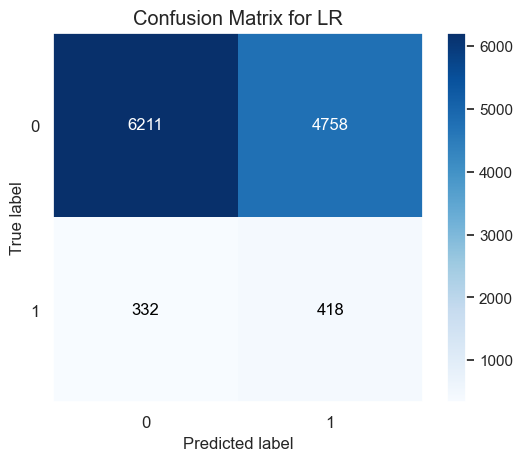

In [129]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_lr, normalize=False, title = 'Confusion Matrix for LR')

### 3.2 Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_resample_ru, y_resample_ru)

y_pred_rf = rf_classifier.predict(X_test)

In [131]:
# Compute evaluation metrics
accuracy_ur = accuracy_score(Y_test, y_pred_rf) 
precision_ur = precision_score(Y_test, y_pred_rf, average='weighted')
recall_ur = recall_score(Y_test, y_pred_rf, average='weighted')
f1_ur = f1_score(Y_test, y_pred_rf, average='weighted')
prob_rf = rf_classifier.predict_proba(X_test)
logloss_ur = log_loss(Y_test, rf_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_rf).ravel()

# Calculate specificity
specificity_ur = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ur = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for Random Forest")
print('************'*3)

print('Accuracy:', accuracy_ur)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ur)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ur)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ur)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ur)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ur)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ur )

Efficiency Metrics for Random Forest
************************************
Accuracy: 0.5811076030378018
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8970538504496948
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5811076030378018
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6854702477479212
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.7161011249175372
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5814568328926976
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.04309292623513655


<Axes: title={'center': 'Confusion Matrix for RF'}, xlabel='Predicted label', ylabel='True label'>

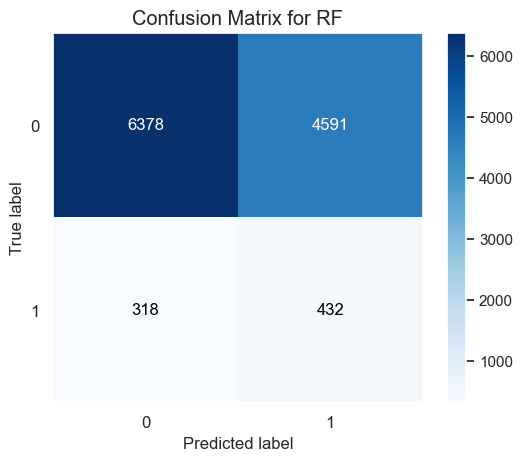

In [132]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_rf, normalize=False, title = 'Confusion Matrix for RF')

### 3.3 Multilayer Perceptron

In [133]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,))
nn_model.fit(X_resample_ru, y_resample_ru)

y_pred_nn = nn_model.predict(X_test)

In [134]:
# Compute evaluation metrics
accuracy_um = accuracy_score(Y_test, y_pred_nn) 
precision_um = precision_score(Y_test, y_pred_nn, average='weighted')
recall_um = recall_score(Y_test, y_pred_nn, average='weighted')
f1_um = f1_score(Y_test, y_pred_nn, average='weighted')
prob_mlp = nn_model.predict_proba(X_test)
logloss_um = log_loss(Y_test, nn_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nn).ravel()

# Calculate specificity
specificity_um = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_um = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for MLP")
print('************'*3)

print('Accuracy:', accuracy_um)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_um)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_um)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_um)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_um)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_um)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_um )

Efficiency Metrics for MLP
************************************
Accuracy: 0.47043263077054354
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.9011115017539602
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.47043263077054354
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.586235606928267
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6946295948747162
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.45455374236484636
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.034346784316630845


<Axes: title={'center': 'Confusion Matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

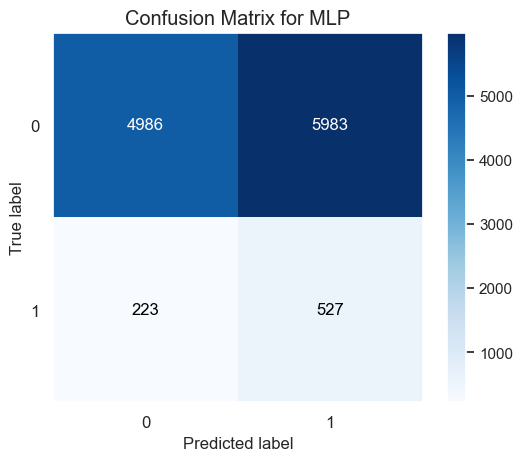

In [135]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nn, normalize=False, title = 'Confusion Matrix for MLP')

### 3.4 Support Vector Machining

In [136]:
from sklearn.svm import SVC

svm_classifier = SVC(probability = True, kernel='linear')
svm_classifier.fit(X_resample_ru, y_resample_ru)

y_pred_svm = svm_classifier.predict(X_test)

In [138]:
# Compute evaluation metrics
accuracy_us = accuracy_score(Y_test, y_pred_svm) 
precision_us = precision_score(Y_test, y_pred_svm, average='weighted')
recall_us = recall_score(Y_test, y_pred_svm, average='weighted')
f1_us = f1_score(Y_test, y_pred_svm, average='weighted')
logloss_us = log_loss(Y_test, svm_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_svm).ravel()

# Calculate specificity
specificity_us = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_us = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for SVM")
print('************'*3)

print('Accuracy:', accuracy_us)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_us)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_us)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_us)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_us)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_us)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_us )

Efficiency Metrics for SVM
************************************
Accuracy: 0.547657649970134
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8943219094402449
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.547657649970134
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6576699220480946
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6750997406723163
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5454462576351536
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03215678748640543


<Axes: title={'center': 'Confusion Matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

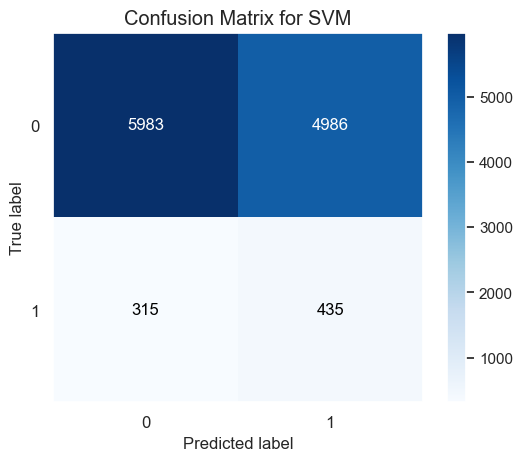

In [139]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_svm, normalize=False, title = 'Confusion Matrix for SVM')

### 3.5 Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_resample_ru, y_resample_ru)

y_pred_nb = nb_classifier.predict(X_test)

In [141]:
# Compute evaluation metrics
accuracy_un = accuracy_score(Y_test, y_pred_nb) 
precision_un = precision_score(Y_test, y_pred_nb, average='weighted')
recall_un = recall_score(Y_test, y_pred_nb, average='weighted')
f1_un = f1_score(Y_test, y_pred_nb, average='weighted')
prob_nb = nb_classifier.predict_proba(X_test)
logloss_un = log_loss(Y_test, nb_classifier.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_nb).ravel()

# Calculate specificity
specificity_un = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_un = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for NB")
print('************'*3)

print('Accuracy:', accuracy_un)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_un)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_un)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_un)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_un)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_un)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_un )

Efficiency Metrics for NB
************************************
Accuracy: 0.5261541087123475
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8946748427152463
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5261541087123475
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6388771852689458
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.7024822914387412
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5209226000546996
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.03030105477674314


<Axes: title={'center': 'Confusion Matrix for NB'}, xlabel='Predicted label', ylabel='True label'>

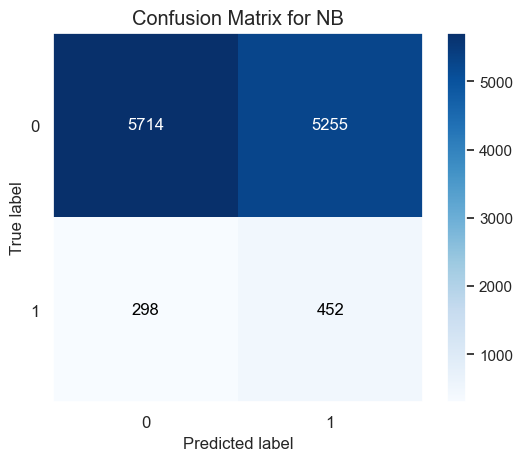

In [142]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=False, title = 'Confusion Matrix for NB')

### 3.6 Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resample_ru, y_resample_ru)

y_pred_dt = dt_model.predict(X_test)

In [144]:
# Compute evaluation metrics
accuracy_ud = accuracy_score(Y_test, y_pred_dt) 
precision_ud = precision_score(Y_test, y_pred_dt, average='weighted')
recall_ud = recall_score(Y_test, y_pred_dt, average='weighted')
f1_ud = f1_score(Y_test, y_pred_dt, average='weighted')
prob_dt = dt_model.predict_proba(X_test)
logloss_ud = log_loss(Y_test, dt_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_dt).ravel()

# Calculate specificity
specificity_ud = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ud = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for DT")
print('************'*3)

print('Accuracy:', accuracy_ud)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ud)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ud)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ud)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ud)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ud)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ud )

Efficiency Metrics for DT
************************************
Accuracy: 0.5303353528458059
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.8881950455719007
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5303353528458059
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.643361743309338
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 16.928429751147778
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5296745373324825
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.0174627419918599


<Axes: title={'center': 'Confusion Matrix for DT'}, xlabel='Predicted label', ylabel='True label'>

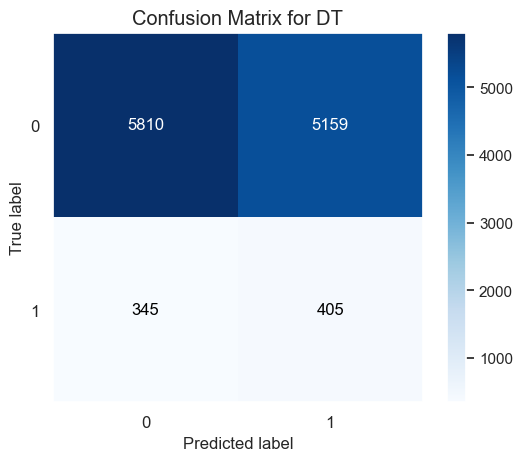

In [145]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_dt, normalize=False, title = 'Confusion Matrix for DT')

### 3.7 XGBoost Classifier

In [146]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_resample_ru, y_resample_ru)

y_pred_xgb = xgb_model.predict(X_test)

In [147]:
# Compute evaluation metrics
accuracy_ux = accuracy_score(Y_test, y_pred_xgb) 
precision_ux = precision_score(Y_test, y_pred_xgb, average='weighted')
recall_ux = recall_score(Y_test, y_pred_xgb, average='weighted')
f1_ux = f1_score(Y_test, y_pred_xgb, average='weighted')
prob_xgb = xgb_model.predict_proba(X_test)
logloss_ux = log_loss(Y_test, xgb_model.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_xgb).ravel()

# Calculate specificity
specificity_ux = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ux = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for XGB")
print('************'*3)

print('Accuracy:', accuracy_ux)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ux)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ux)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ux)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ux)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ux)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ux )

Efficiency Metrics for XGB
************************************
Accuracy: 0.5301646898199505
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.9057064508591042
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5301646898199505
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6410372415168002
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.6529617706394152
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5188257817485641
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.05193453664406619


<Axes: title={'center': 'Confusion Matrix for XGB'}, xlabel='Predicted label', ylabel='True label'>

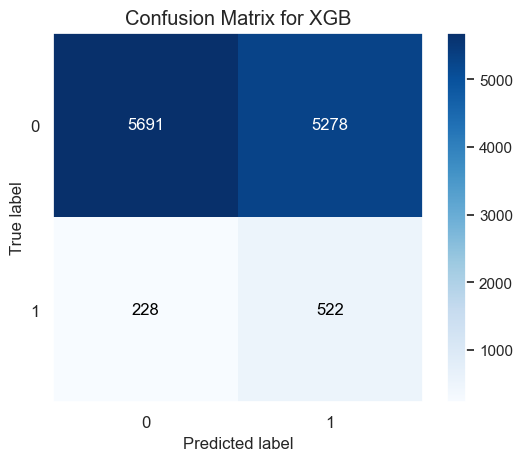

In [148]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_xgb, normalize=False, title = 'Confusion Matrix for XGB')

### 3.8 AdaBoost

In [149]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model_abc = abc.fit(X_resample_ru, y_resample_ru)

y_pred_ab = model_abc.predict(X_test)

In [150]:
# Compute evaluation metrics
accuracy_ua = accuracy_score(Y_test, y_pred_ab) 
precision_ua = precision_score(Y_test, y_pred_ab, average='weighted')
recall_ua = recall_score(Y_test, y_pred_ab, average='weighted')
f1_ua = f1_score(Y_test, y_pred_ab, average='weighted')
prob_ab = model_abc.predict_proba(X_test)
logloss_ua = log_loss(Y_test, model_abc.predict_proba(X_test))


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ab).ravel()

# Calculate specificity
specificity_ua = tn / (tn + fp)

# Calculate Cohen's Kappa
po = (tp + tn) / len(Y_test)
pe = ((tp + fn) * (tp + fp) + (tn + fp) * (tn + fn)) / len(Y_test) ** 2
kappa_ua = (po - pe) / (1 - pe)


# Print evaluation metrics
print("Efficiency Metrics for ADB")
print('************'*3)

print('Accuracy:', accuracy_ua)
print('=+=+=+=+=+=+'*3)
print('Precision:', precision_ua)
print('=+=+=+=+=+=+'*3)
print('Recall:', recall_ua)
print('=+=+=+=+=+=+'*3)
print('F1 score:', f1_ua)
print('=+=+=+=+=+=+'*3)
print('log_loss:', logloss_ua)
print('=+=+=+=+=+=+'*3)
print('specificity:', specificity_ua)
print('=+=+=+=+=+=+'*3)
print('kappa:', kappa_ua )

Efficiency Metrics for ADB
************************************
Accuracy: 0.5500469323321102
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Precision: 0.900931293587524
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Recall: 0.5500469323321102
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
F1 score: 0.6590080019532564
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
log_loss: 0.691410893356851
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
specificity: 0.5439876014221898
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
kappa: 0.04637841144331947


<Axes: title={'center': 'Confusion Matrix for ADB'}, xlabel='Predicted label', ylabel='True label'>

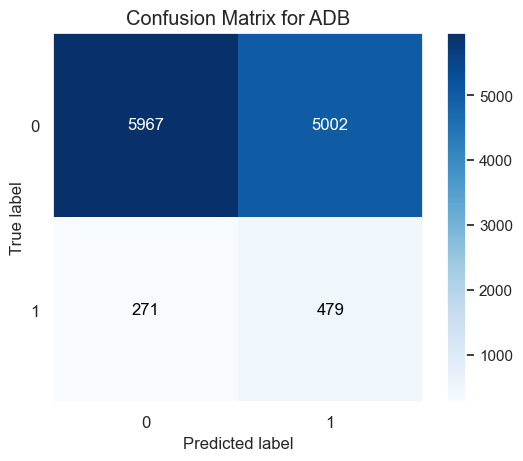

In [151]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_ab, normalize=False, title = 'Confusion Matrix for ADB')

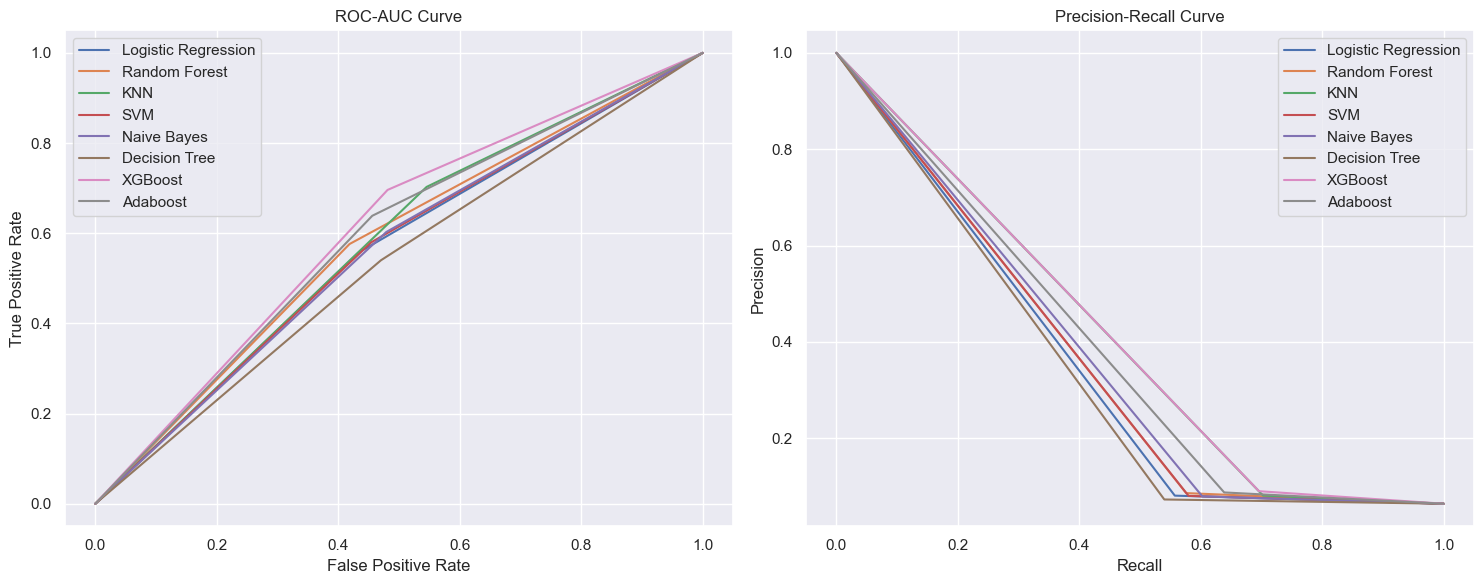

In [152]:

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# ROC-AUC curve
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)
fpr_nn, tpr_nn, _ = roc_curve(Y_test, y_pred_nn)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_pred_svm)
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_pred_xgb)
fpr_ab, tpr_ab, _ = roc_curve(Y_test, y_pred_ab)




# Precision-recall curve
precision_lr, recall_lr, _ = precision_recall_curve(Y_test, y_pred_lr)
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, y_pred_rf)
precision_nn, recall_nn, _ = precision_recall_curve(Y_test, y_pred_nn)
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, y_pred_svm)
precision_nb, recall_nb, _ = precision_recall_curve(Y_test, y_pred_nb)
precision_dt, recall_dt, _ = precision_recall_curve(Y_test, y_pred_dt)
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, y_pred_xgb)
precision_ab, recall_ab, _ = precision_recall_curve(Y_test, y_pred_ab)

# ROC-AUC curve

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nn, tpr_nn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_ab, tpr_ab, label='Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

# Precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_nn, precision_nn, label='KNN')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_ab, precision_ab, label='Adaboost')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

### Compairing the models

In [153]:
model = ['Logistic Regression','Random Forest','MLP','SVM','Naive Bayes','Decision Tree','XGBoost','Adaboost']
Accuracy = [accuracy_ol, accuracy_or,  accuracy_om,  accuracy_os,  accuracy_on, accuracy_od,  accuracy_ox,  accuracy_oa]
Precision = [precision_ol,precision_or, precision_om, precision_os, precision_on,precision_od, precision_ox, precision_oa]
Recall = [recall_ol,recall_or, recall_om, recall_os, recall_on,recall_od, recall_ox, recall_oa]
F1_score = [f1_ol,f1_or, f1_om, f1_os, f1_on,f1_od, f1_ox, f1_oa]
log_loss = [logloss_ol,logloss_or, logloss_om, logloss_os, logloss_on,logloss_od, logloss_ox, logloss_oa]
specificity = [specificity_ol,specificity_or, specificity_om, specificity_os, specificity_on, specificity_od, specificity_ox,specificity_oa]
kappa = [kappa_ol,kappa_or, kappa_om, kappa_os, kappa_on,kappa_od,  kappa_ox, kappa_oa]


data_ro = {'Model':model,
       "Accuracy": Accuracy,
       "Precision": Precision,
       "Recall":Recall,
       "F1 Score": F1_score,
       "Log_loss": log_loss,
       "Specificity": specificity,
       "Kappa": kappa}

df_ro = pd.DataFrame(data_ro)


In [154]:
df_ro

Model  Accuracy  Precision    Recall  F1 Score  Log_loss  \
0  Logistic Regression  0.566431   0.895281  0.566431  0.673470  0.670479   
1        Random Forest  0.920642   0.881451  0.920642  0.899526  0.446004   
2                  MLP  0.669170   0.897311  0.669170  0.753460  0.560656   
3                  SVM  0.544244   0.894419  0.544244  0.654723  0.674944   
4          Naive Bayes  0.545866   0.895445  0.545866  0.656007  0.684473   
5        Decision Tree  0.879427   0.882422  0.879427  0.880918  4.345907   
6              XGBoost  0.553034   0.905462  0.553034  0.661088  0.639663   
7             Adaboost  0.533407   0.903825  0.533407  0.644151  0.691080   

   Specificity     Kappa  
0     0.566050  0.036745  
1     0.982040  0.007056  
2     0.680828  0.061034  
3     0.541526  0.031943  
4     0.542711  0.034319  
5     0.933722  0.018582  
6     0.544535  0.056132  
7     0.523566  0.049054

<Figure size 1500x1000 with 0 Axes>

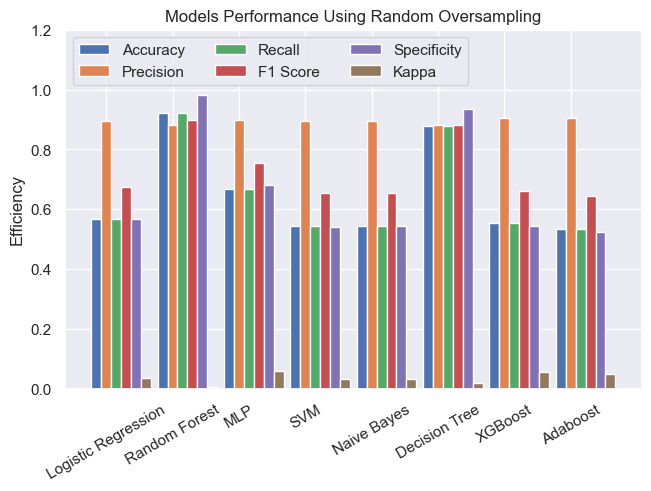

In [179]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,10))
Models = df_ro['Model']
metrics = {
    'Accuracy': df_ro['Accuracy'],
    'Precision': df_ro['Precision'],
    'Recall': df_ro['Recall'],
    'F1 Score': df_ro['F1 Score'],
    'Specificity': df_ro['Specificity'],
    'Kappa': df_ro['Kappa']
}

x = np.arange(len(Models))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3, fmt = '%0.1f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Efficiency')
ax.set_title('Models Performance Using Random Oversampling')
ax.set_xticks(x + width, Models, rotation = 30)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

In [155]:
model = ['Logistic Regression','Random Forest','MLP','SVM','Naive Bayes','Decision Tree','XGBoost','Adaboost']
Accuracy = [accuracy_ml, accuracy_mr,  accuracy_mm,  accuracy_ms,  accuracy_mn, accuracy_md,  accuracy_mx,  accuracy_ma]
Precision = [precision_ml,precision_mr, precision_mm, precision_ms, precision_mn,precision_md, precision_mx, precision_ma]
Recall = [recall_ml,recall_mr, recall_mm, recall_ms, recall_mn,recall_md, recall_mx, recall_ma]
F1_score = [f1_ml,f1_mr, f1_mm, f1_ms, f1_mn,f1_md, f1_mx, f1_ma]
log_loss = [logloss_ml,logloss_mr, logloss_mm, logloss_ms, logloss_mn,logloss_md, logloss_mx, logloss_ma]
specificity = [specificity_ml,specificity_mr, specificity_mm, specificity_ms, specificity_mn, specificity_md, specificity_mx,specificity_ma]
kappa = [kappa_ml,kappa_mr, kappa_mm, kappa_ms, kappa_mn,kappa_md,  kappa_mx, kappa_ma]


data_sm = {'Model':model,
       "Accuracy": Accuracy,
       "Precision": Precision,
       "Recall":Recall,
       "F1 Score": F1_score,
       "Log_loss": log_loss,
       "Specificity": specificity,
       "Kappa": kappa}

df_sm = pd.DataFrame(data_sm)

In [156]:
df_sm

Model  Accuracy  Precision    Recall  F1 Score  Log_loss  \
0  Logistic Regression  0.573086   0.895490  0.573086  0.678988  0.669608   
1        Random Forest  0.882157   0.883532  0.882157  0.882843  0.394029   
2                  MLP  0.591177   0.896606  0.591177  0.693698  0.645873   
3                  SVM  0.545439   0.894680  0.545439  0.655724  0.674191   
4          Naive Bayes  0.558836   0.894415  0.558836  0.667173  0.679225   
5        Decision Tree  0.860654   0.883065  0.860654  0.871502  5.022552   
6              XGBoost  0.883352   0.889363  0.883352  0.886317  0.427195   
7             Adaboost  0.653981   0.893669  0.653981  0.742277  0.688920   

   Specificity     Kappa  
0     0.573434  0.038176  
1     0.936184  0.027855  
2     0.593126  0.043662  
3     0.542711  0.032646  
4     0.558027  0.033769  
5     0.911569  0.023154  
6     0.933722  0.076268  
7     0.666332  0.046127

<Figure size 1500x1000 with 0 Axes>

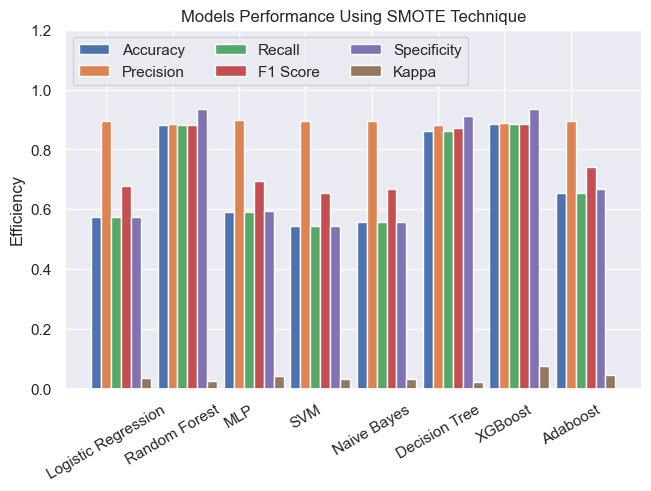

In [180]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,10))
Models = df_sm['Model']
metrics = {
    'Accuracy': df_sm['Accuracy'],
    'Precision': df_sm['Precision'],
    'Recall': df_sm['Recall'],
    'F1 Score': df_sm['F1 Score'],
    'Specificity': df_sm['Specificity'],
    'Kappa': df_sm['Kappa']
}

x = np.arange(len(Models))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3, fmt = '%0.1f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Efficiency')
ax.set_title('Models Performance Using SMOTE Technique')
ax.set_xticks(x + width, Models, rotation = 30)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

In [157]:
model = ['Logistic Regression','Random Forest','MLP','SVM','Naive Bayes','Decision Tree','XGBoost','Adaboost']
Accuracy = [accuracy_ul, accuracy_ur,  accuracy_um,  accuracy_us,  accuracy_un, accuracy_ud,  accuracy_ux,  accuracy_ua]
Precision = [precision_ul,precision_ur, precision_um, precision_us, precision_un,precision_ud, precision_ux, precision_ua]
Recall = [recall_ul,recall_ur, recall_um, recall_us, recall_un,recall_ud, recall_ux, recall_ua]
F1_score = [f1_ul,f1_ur, f1_um, f1_us, f1_un,f1_ud, f1_ux, f1_ua]
log_loss = [logloss_ul,logloss_ur, logloss_um, logloss_us, logloss_un,logloss_ud, logloss_ux, logloss_ua]
specificity = [specificity_ul,specificity_ur, specificity_um, specificity_us, specificity_un, specificity_ud, specificity_ux,specificity_ua]
kappa = [kappa_ul,kappa_ur, kappa_um, kappa_us, kappa_un,kappa_ud,  kappa_ux, kappa_ua]


data_ru = {'Model':model,
       "Accuracy": Accuracy,
       "Precision": Precision,
       "Recall":Recall,
       "F1 Score": F1_score,
       "Log_loss": log_loss,
       "Specificity": specificity,
       "Kappa": kappa}

df_ru = pd.DataFrame(data_ru)

In [158]:
df_ru

Model  Accuracy  Precision    Recall  F1 Score   Log_loss  \
0  Logistic Regression  0.565663   0.893676  0.565663  0.672974   0.671931   
1        Random Forest  0.581108   0.897054  0.581108  0.685470   0.716101   
2                  MLP  0.470433   0.901112  0.470433  0.586236   0.694630   
3                  SVM  0.547658   0.894322  0.547658  0.657670   0.675100   
4          Naive Bayes  0.526154   0.894675  0.526154  0.638877   0.702482   
5        Decision Tree  0.530335   0.888195  0.530335  0.643362  16.928430   
6              XGBoost  0.530165   0.905706  0.530165  0.641037   0.652962   
7             Adaboost  0.550047   0.900931  0.550047  0.659008   0.691411   

   Specificity     Kappa  
0     0.566232  0.032960  
1     0.581457  0.043093  
2     0.454554  0.034347  
3     0.545446  0.032157  
4     0.520923  0.030301  
5     0.529675  0.017463  
6     0.518826  0.051935  
7     0.543988  0.046378

<Figure size 1500x1000 with 0 Axes>

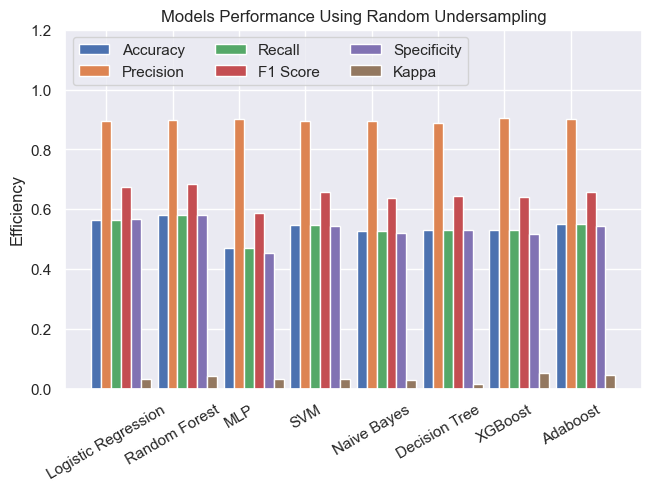

In [181]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,10))
Models = df_ru['Model']
metrics = {
    'Accuracy': df_ru['Accuracy'],
    'Precision': df_ru['Precision'],
    'Recall': df_ru['Recall'],
    'F1 Score': df_ru['F1 Score'],
    'Specificity': df_ru['Specificity'],
    'Kappa': df_ru['Kappa']
}

x = np.arange(len(Models))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3, fmt = '%0.1f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Efficiency')
ax.set_title('Models Performance Using Random Undersampling')
ax.set_xticks(x + width, Models, rotation = 30)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

### Conclusion

- The insurance industry faces a significant challenge in predicting risk assessment in insurance policies. Thus, this project is an attempt to proposes an accurate predictive model using machine  learning (ML) and resampling techniques to assist insurance companies in making better pricing decisions.

    - After comparing all the model using different resampling techniques and different model algorithms we can finalise the following outcomes:
    - The random forest (RF) classifier with Random oversampling has the best performance, with an accuracy of 0.92, a precision of 0.88, recall of 0.92, an F-measure of 0.8995, specificity of 0.9820 and a kappa of 0.007. This means that the RF classifier is accurate in predicting whether accept or reject the policy claim and minimize the cost of an Insurance Company.
    - The results demonstrate that ML can be used to create an accurate predictive model for auto insurance risk, which can improve insurance claim classification and pricing decisions. Also identify the high risk customers and low risk customers. 
    - Additionally, the results demonstrate that ML can be effective in addressing data imbalance problems in the auto insurance sector. The Random Oversampling technique outperformed all other resampling  techniques, achieving an accuracy of 92% for the random forest (RF) classifier.    
    - The random forest model is consistent for different resampling techniques.
    - Decision Tree model and XGBoost Model are also giving close result using SMOTE resampling technique.
    - As the objective is to understand the factors that influence claim frequency and enable insurance companies to better assess risk and determine appropriate premiums for policyholders. The random forest model predicts the non acceptance of policy claim with specificity of 98%. Which indicates bussiness can demand minimum premium from the customers and improve their customer base thereby increasing their profit.

